# Kaggle API setup

In [1]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install pandoc

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install hyperopt

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pwd

/N/home/u070/raknarne/Carbonate/Downloads


In [5]:
!mkdir ~/.kaggle
!cp /N/home/u070/raknarne/Carbonate/Downloads/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory '/N/u/raknarne/Carbonate/.kaggle': File exists


In [6]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
application_test.csv                 25MB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  


## Downloading the files via Kaggle API

In [7]:
DATA_DIR = "/N/home/u070/raknarne/Carbonate/Documents/Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

mkdir: cannot create directory '/N/home/u070/raknarne/Carbonate/Documents/Data/home-credit-default-risk': File exists


In [8]:
!ls -l $DATA_DIR

total 3326848
-rw-rw-r-- 1 raknarne raknarne     37383 Dec 11  2019 HomeCredit_columns_description.csv
-rw-rw-r-- 1 raknarne raknarne 392703158 Dec 11  2019 POS_CASH_balance.csv
-rw-rw-r-- 1 raknarne raknarne  26567651 Dec 11  2019 application_test.csv
-rw-rw-r-- 1 raknarne raknarne 166133370 Dec 11  2019 application_train.csv
-rw-rw-r-- 1 raknarne raknarne 170016717 Dec 11  2019 bureau.csv
-rw-rw-r-- 1 raknarne raknarne 375592889 Dec 11  2019 bureau_balance.csv
-rw-rw-r-- 1 raknarne raknarne 424582605 Dec 11  2019 credit_card_balance.csv
-rw-r--r-- 1 raknarne raknarne 721616255 Dec 13 09:54 home-credit-default-risk.zip
-rw-rw-r-- 1 raknarne raknarne 723118349 Dec 11  2019 installments_payments.csv
-rw-rw-r-- 1 raknarne raknarne 404973293 Dec 11  2019 previous_application.csv
-rw-rw-r-- 1 raknarne raknarne    536202 Dec 11  2019 sample_submission.csv


In [9]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR --force

 99%|████████████████████████████████████████▋| 682M/688M [00:06<00:00, 159MB/s]
100%|█████████████████████████████████████████| 688M/688M [00:06<00:00, 109MB/s]


# Imports

In [10]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from scipy import stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Data Loads

## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

![image.png](attachment:image.png)

## Application_Train data load

In [11]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 122)

## Application_Test data load

In [12]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Other Datasets load

In [13]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 32 s, sys: 4.5 s, total: 36.5 s
Wall time: 36.6 s


# EDA

## Missing data for application train

In [14]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MEDI,68.35,210199


## Missing data for application test

In [15]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
COMMONAREA_MEDI,68.72,33495
NONLIVINGAPARTMENTS_AVG,68.41,33347
NONLIVINGAPARTMENTS_MODE,68.41,33347
NONLIVINGAPARTMENTS_MEDI,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780


## Distribution of the target column 

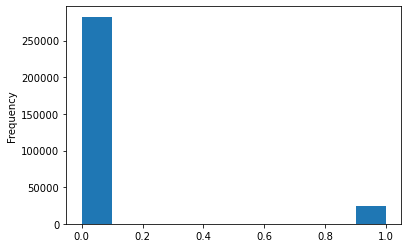

In [16]:
datasets["application_train"]['TARGET'].astype(int).plot.hist();

## Correlation with  the target column 

In [17]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [18]:
app_train=datasets["application_train"]
app_test=datasets["application_test"]

## Distribution of Gender

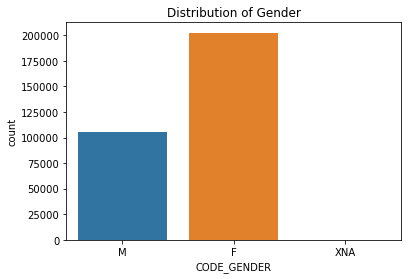

In [19]:
sns.countplot(data = app_train, x ='CODE_GENDER')
plt.title('Distribution of Gender')
plt.show()

## Defaulters by Age group

It looks like we have more female Applicants when compared to male

In [20]:


age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

#age_data

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)



,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"
5,0,-16941,46.413699,"(45.0, 50.0]"
6,0,-13778,37.747945,"(35.0, 40.0]"
7,0,-18850,51.643836,"(50.0, 55.0]"
8,0,-20099,55.065753,"(55.0, 60.0]"
9,0,-14469,39.641096,"(35.0, 40.0]"


In [21]:


# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups



,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,-8532.795625,23.377522
"(25.0, 30.0]",0.111436,-10155.219250,27.822518
"(30.0, 35.0]",0.102814,-11854.848377,32.479037
"(35.0, 40.0]",0.089414,-13707.908253,37.555913
"(40.0, 45.0]",0.078491,-15497.661233,42.459346
"(45.0, 50.0]",0.074171,-17323.900441,47.462741
"(50.0, 55.0]",0.066968,-19196.494791,52.593136
"(55.0, 60.0]",0.055314,-20984.262742,57.491131
"(60.0, 65.0]",0.052737,-22780.547460,62.412459


It can be observed that most of the defaulters are approximately 27-40 yrs old.

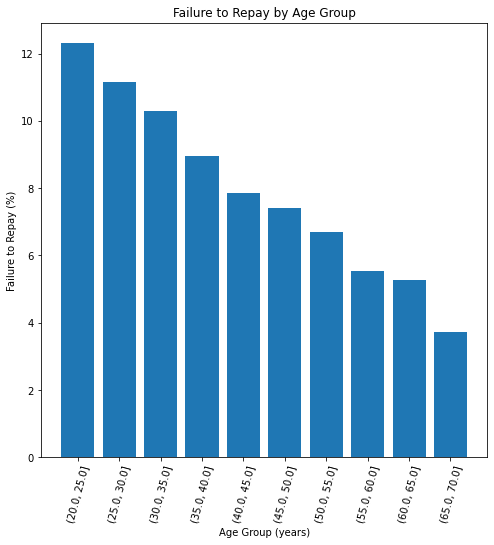

In [22]:
%matplotlib inline
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

## Handling incorrect values of Employment Days

In [23]:
anom = datasets["application_train"][datasets["application_train"]['DAYS_EMPLOYED'] == 365243]
non_anom = datasets["application_train"][datasets["application_train"]['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


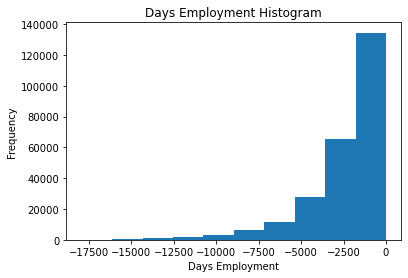

In [24]:
# Remove the anomalies and review the histogram again
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [25]:


# drop column DAYS_EMPLOYED_ANOM
app_train.drop(['DAYS_EMPLOYED_ANOM'], axis=1, inplace=True)
app_train.head()



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Applicants with less than 2 years of employment are less likely to repay the loan.

## Distribution of Contrcat types

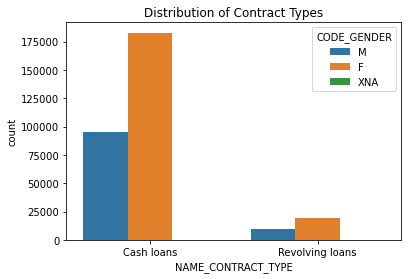

In [26]:
sns.countplot(data = app_train, x ='NAME_CONTRACT_TYPE', hue = 'CODE_GENDER')
plt.title('Distribution of Contract Types')
plt.show()

It can be seen that in general people mostly go for Cash loans as compared to revolving loans and both type of contracts are dominated by females.

## Distribution of Real estate Owners

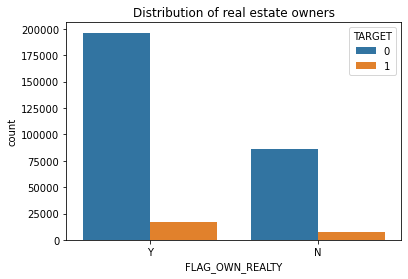

In [27]:
sns.countplot(data = app_train, x ='FLAG_OWN_REALTY', hue = 'TARGET')
plt.title('Distribution of real estate owners')
plt.show()

Generally people who own a realty are more likely to go for loans as compared to people who don't own one.

## Distribution of Income Sources

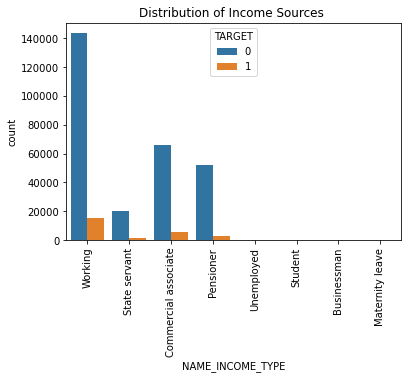

In [28]:
sns.countplot(data = app_train, x ='NAME_INCOME_TYPE', hue = 'TARGET')
plt.title('Distribution of Income Sources ')
plt.xticks(rotation = 90)
plt.show()

It can be observed that most of the defaulters belong to the working class followed by Commercial associates. A state servant is the least likely to fail repaying the loan amount

## Occupation Types

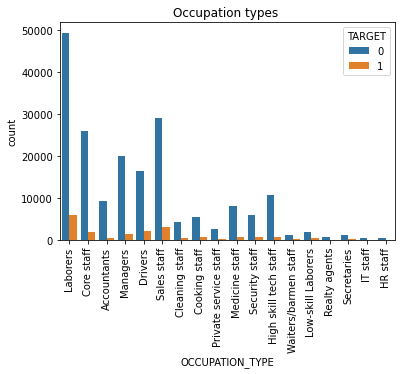

In [29]:
sns.countplot(data = app_train, x ='OCCUPATION_TYPE', hue = 'TARGET')
plt.title('Occupation types ')
plt.xticks(rotation = 90)
plt.show()

People who do not provide their occupation details and those who are labourers are more likely to fail paying back the loan.

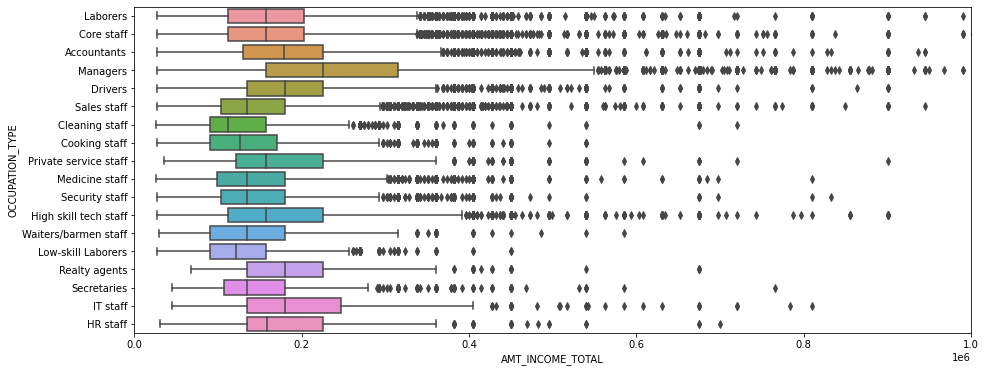

In [30]:
ig, ax = plt.subplots(figsize=(15, 6))
ax = sns.boxplot(y = "OCCUPATION_TYPE", x = "AMT_INCOME_TOTAL", orient = "h", data = app_train)
plt.xlim([0, 1e6])
plt.show()

## Basic EDA of all the data sets

### Previous Application Data


************************** previous_applications ******************************

Performing basic EDA on previous_applications dataset

* The dataset has 1670214 rows and 37 columns.

* First 10 rows of the dataset:



,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN



* Describing the dataset statistics:



,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000



* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DO

None


* Check data distribution: 


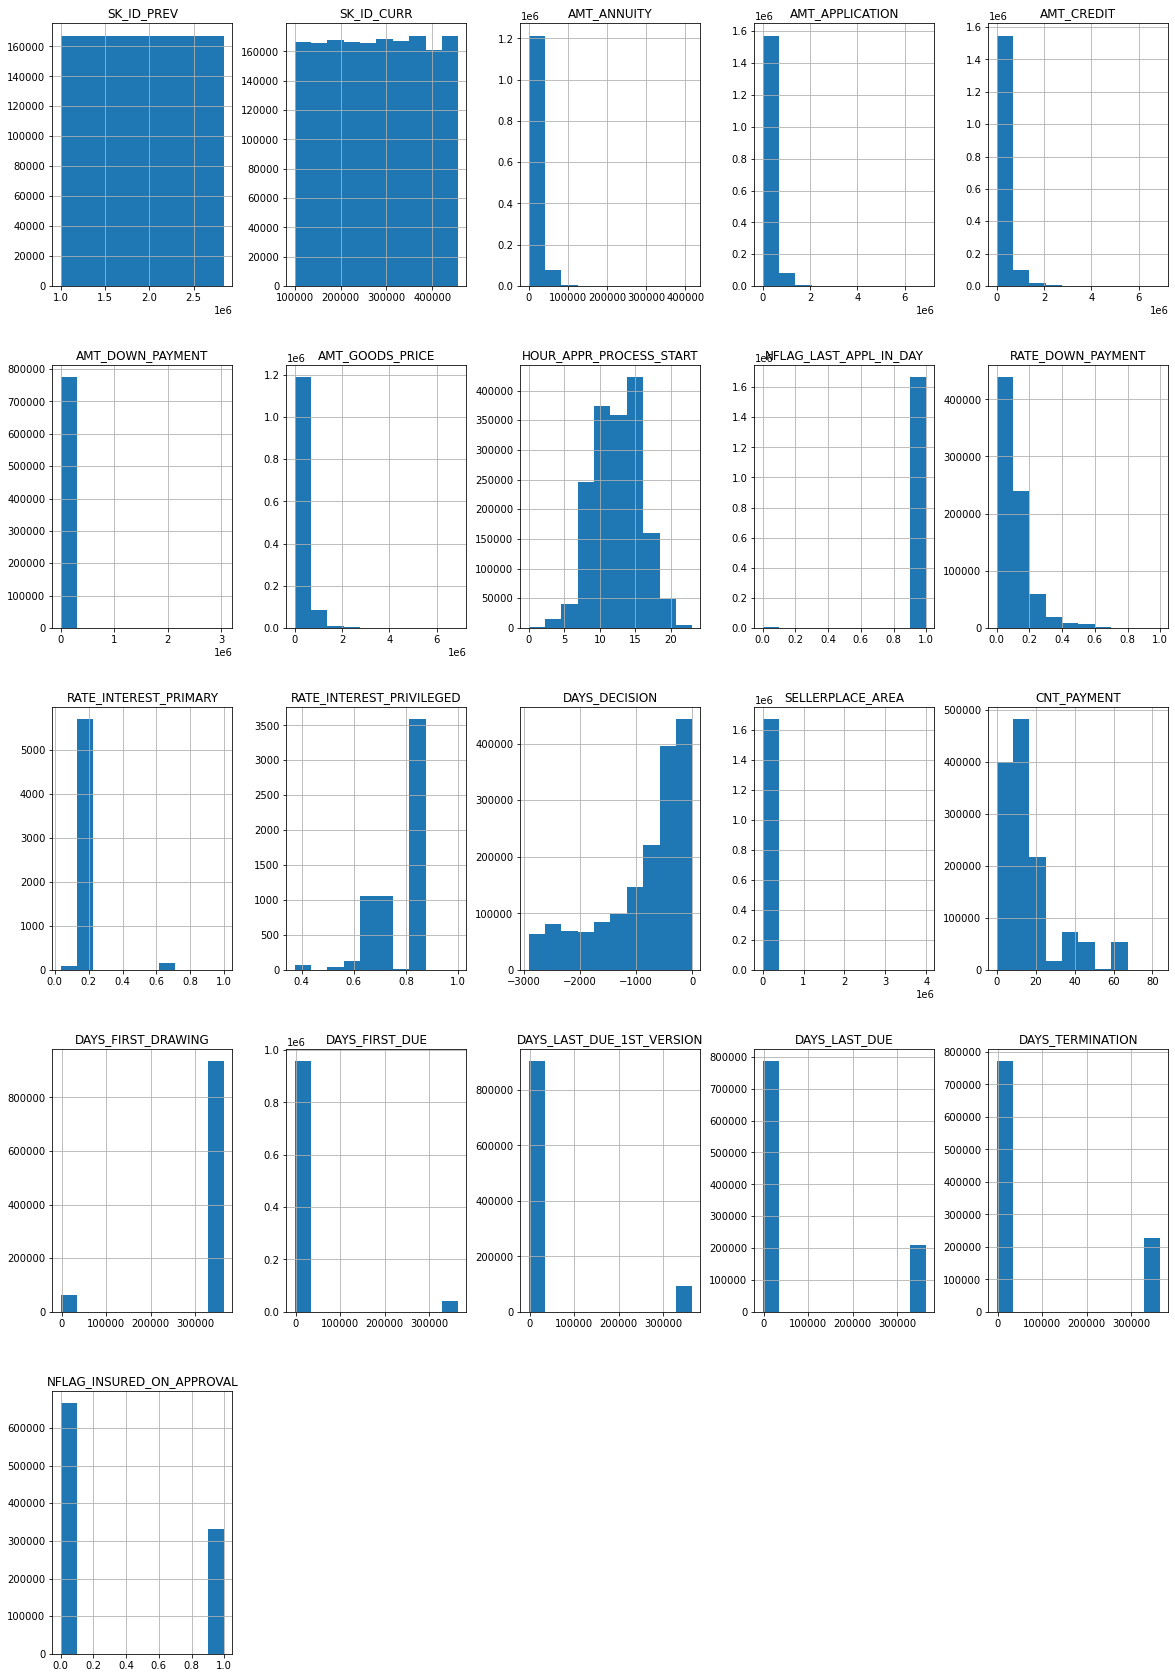

In [31]:


def basic_eda(df, datafile_name="Datafile name"):
    print(f"\n**************************",datafile_name,"******************************\n")
    print(f"Performing basic EDA on {datafile_name} dataset\n")
    print(f"* The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    print("\n* First 10 rows of the dataset:\n")
    display(df.head(10))
    print("\n* Describing the dataset statistics:\n", )
    display(df.describe())
    print("\n* Fetching info of the dataset: \n")
    display(df.info())
    print("\n* Check data distribution: ")
    df.hist(figsize=(20,30))
    
    
df_prev_app = datasets["previous_application"]
basic_eda(df_prev_app, 'previous_applications')



In [32]:
# Missing Values in Application Data

percent = (df_prev_app.isnull().sum()/df_prev_app.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = df_prev_app.isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)



,Percent,Train Missing Count
RATE_INTEREST_PRIVILEGED,99.64,1664263
RATE_INTEREST_PRIMARY,99.64,1664263
AMT_DOWN_PAYMENT,53.64,895844
RATE_DOWN_PAYMENT,53.64,895844
NAME_TYPE_SUITE,49.12,820405
NFLAG_INSURED_ON_APPROVAL,40.30,673065
DAYS_TERMINATION,40.30,673065
DAYS_LAST_DUE,40.30,673065
DAYS_LAST_DUE_1ST_VERSION,40.30,673065
DAYS_FIRST_DUE,40.30,673065


In [33]:


# Dropping columns RATE_INTEREST_PRIVILEGED and RATE_INTEREST_PRIMARY as these have more than 99% data missing
df_prev_app.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1, inplace=True)

# Create correlation matrix
corr_matrix = df_prev_app.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Dropping: ", to_drop)
# Drop features 
df_prev_app_new = df_prev_app.drop(df_prev_app[to_drop], axis=1)

df_prev_app_new.head()



Dropping:  ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_TERMINATION']


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,0.0,SATURDAY,15,Y,1,...,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,NaN,THURSDAY,11,Y,1,...,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,NaN,TUESDAY,11,Y,1,...,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,NaN,MONDAY,7,Y,1,...,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,NaN,THURSDAY,9,Y,1,...,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN


### POS_CASH_balance Data


************************** POS_CASH_balance ******************************

Performing basic EDA on POS_CASH_balance dataset

* The dataset has 10001358 rows and 8 columns.

* First 10 rows of the dataset:



,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
5,2207092,342166,-32,12.0,12.0,Active,0,0
6,1110516,204376,-38,48.0,43.0,Active,0,0
7,1387235,153211,-35,36.0,36.0,Active,0,0
8,1220500,112740,-31,12.0,12.0,Active,0,0
9,2371489,274851,-32,24.0,16.0,Active,0,0



* Describing the dataset statistics:



,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03



* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


None


* Check data distribution: 


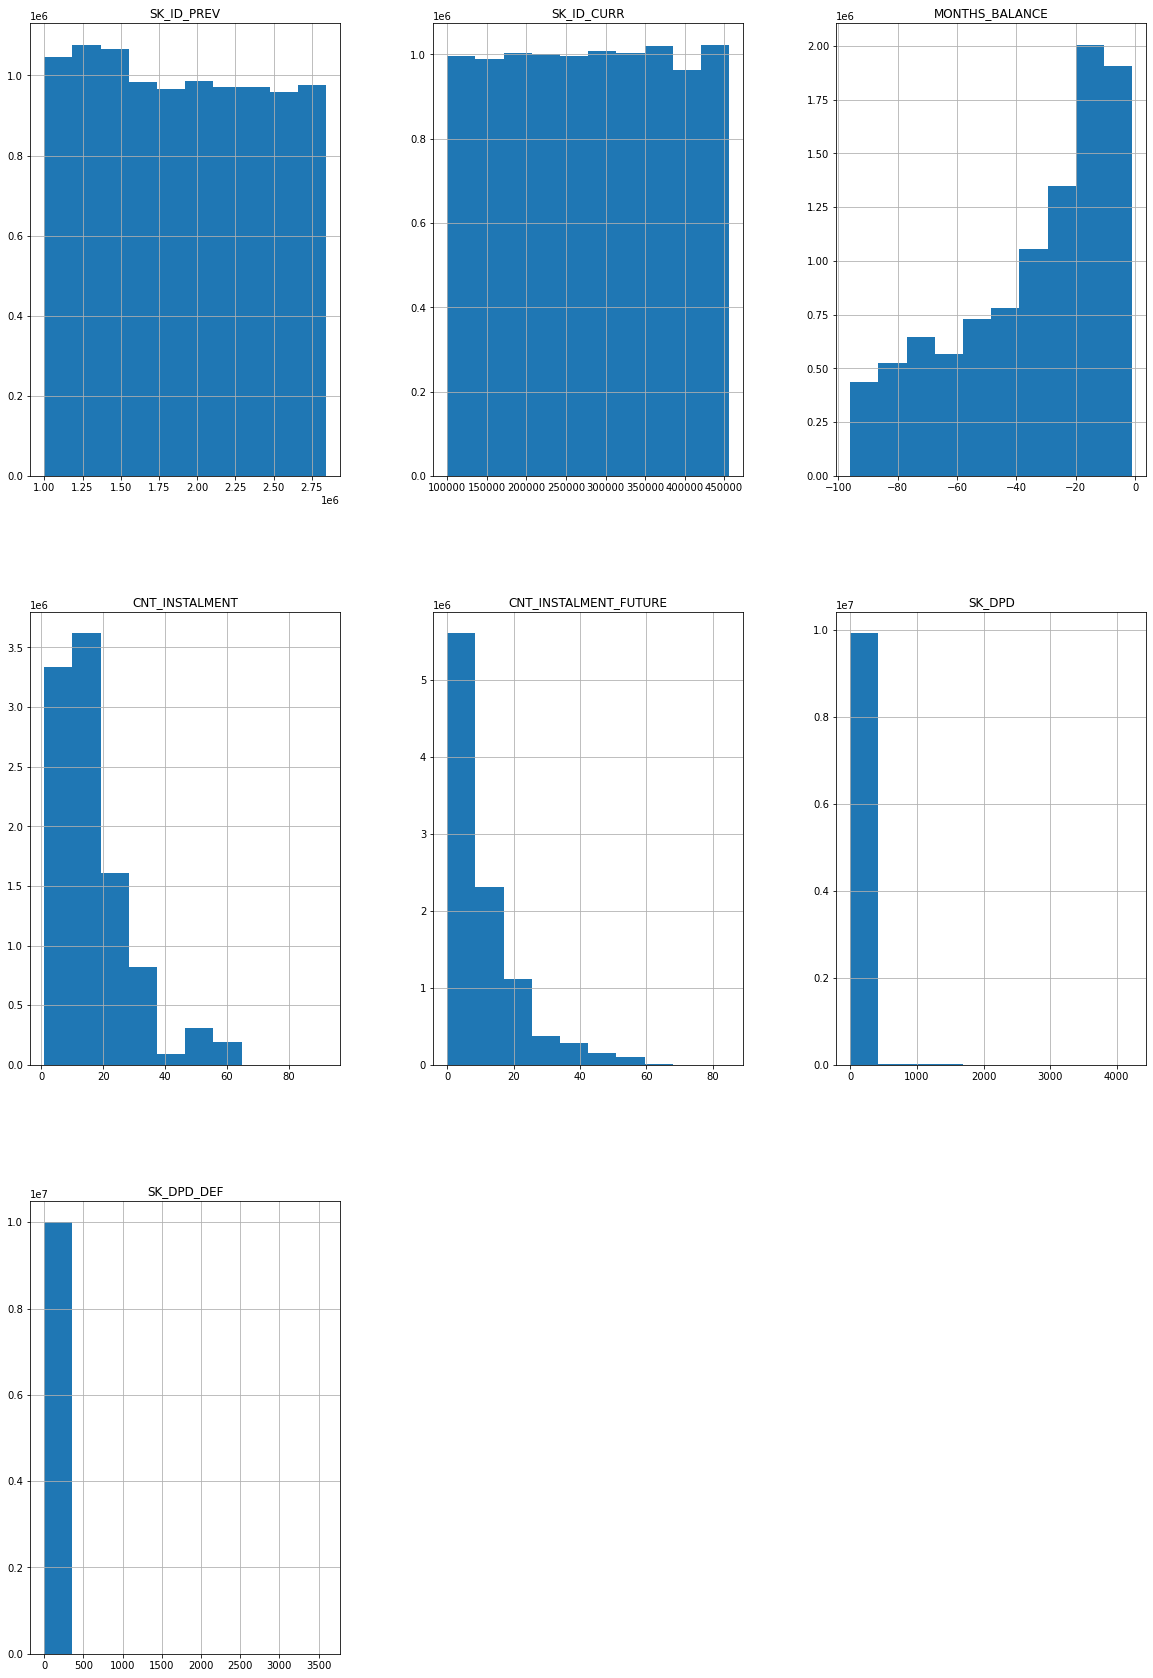

In [34]:


df_pos_cash = datasets['POS_CASH_balance']
basic_eda(df_pos_cash, 'POS_CASH_balance')



In [35]:
# This gives us latest record of each loan
# MONTHS_BALANCE has 0 for current, -1 for previous etc.
# Value of -8 in this field means 8 months back the loan was completed.

df_pos_cash_latest = df_pos_cash.loc[df_pos_cash.groupby(['SK_ID_PREV','SK_ID_CURR'])['MONTHS_BALANCE'].idxmax()]   

df_pos_cash_latest.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
45995,1000001,158271,-8,2.0,0.0,Completed,0,0
2792302,1000002,101962,-50,4.0,0.0,Completed,0,0
7085917,1000003,252457,-1,12.0,9.0,Active,0,0
4078063,1000004,260094,-22,7.0,0.0,Completed,0,0
7852623,1000005,176456,-46,10.0,0.0,Completed,0,0


In [36]:
df_pos_cash_latest['NAME_CONTRACT_STATUS'].value_counts()

Completed                698421
Active                   236149
Signed                     1272
Returned to the store       304
Demand                      102
Approved                     58
Amortized debt               17
Canceled                      2
Name: NAME_CONTRACT_STATUS, dtype: int64

<AxesSubplot:xlabel='count', ylabel='NAME_CONTRACT_STATUS'>

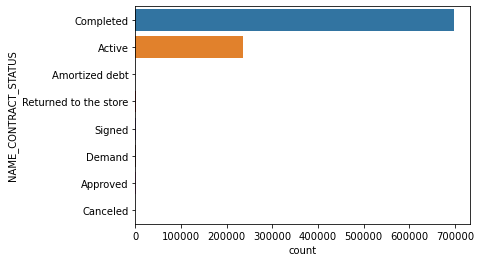

In [37]:


sns.countplot(y='NAME_CONTRACT_STATUS', data=df_pos_cash_latest)



### Bureau Data


************************** bureau ******************************

Performing basic EDA on bureau dataset

* The dataset has 1716428 rows and 17 columns.

* First 10 rows of the dataset:



,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN



* Describing the dataset statistics:



,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08



* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


None


* Check data distribution: 


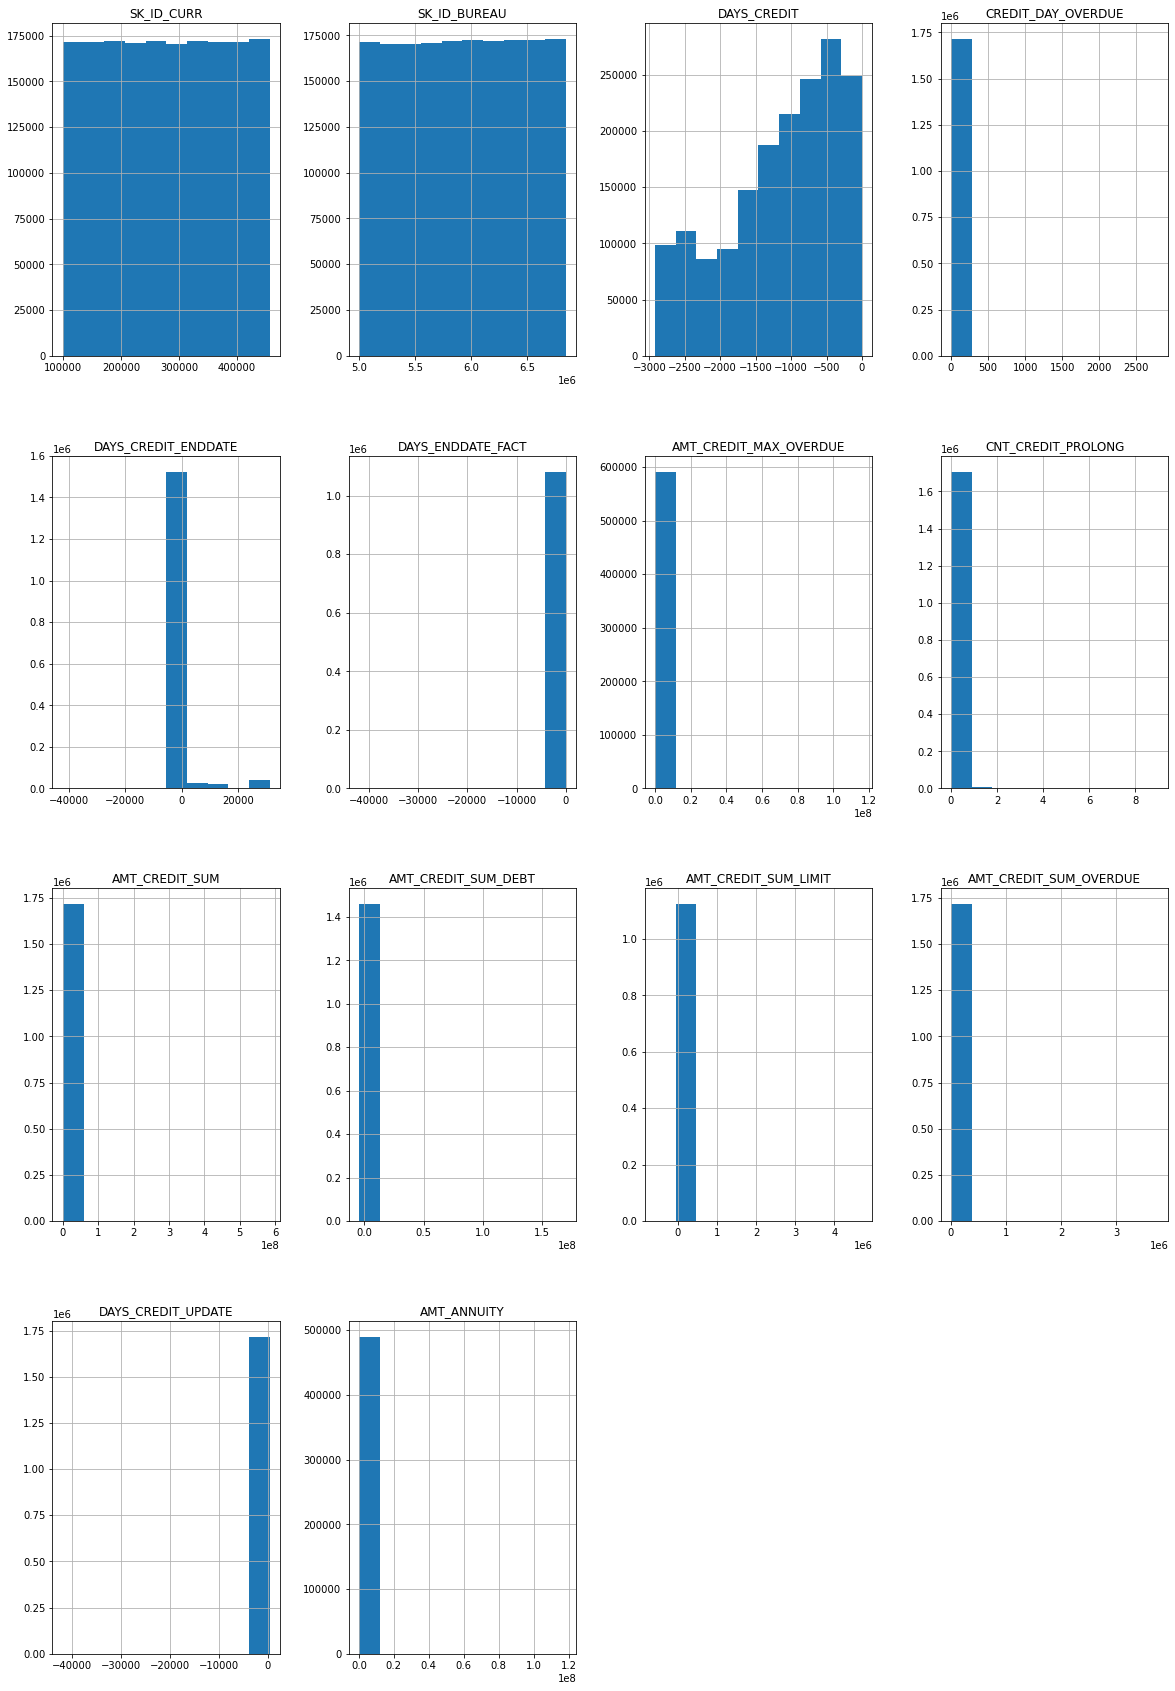

In [38]:


bureau_df = datasets['bureau']
basic_eda(bureau_df, 'bureau')



### Credit Card Balance Data


************************** credit_card_balance ******************************

Performing basic EDA on credit_card_balance dataset

* The dataset has 3840312 rows and 23 columns.

* First 10 rows of the dataset:



,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.500,0.0,877.500,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,0.0,0.000,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.000,0.0,0.000,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.000,0.0,0.000,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.000,0.0,11547.000,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
5,2646502,380010,-7,82903.815,270000,0.0,0.000,0.0,0.000,4449.105,...,82773.315,82773.315,0.0,0,0.0,0.0,2.0,Active,7,0
6,1079071,171320,-6,353451.645,585000,67500.0,67500.000,0.0,0.000,14684.175,...,351881.145,351881.145,1.0,1,0.0,0.0,6.0,Active,0,0
7,2095912,118650,-7,47962.125,45000,45000.0,45000.000,0.0,0.000,0.000,...,47962.125,47962.125,1.0,1,0.0,0.0,51.0,Active,0,0
8,2181852,367360,-4,291543.075,292500,90000.0,289339.425,0.0,199339.425,130.500,...,286831.575,286831.575,3.0,8,0.0,5.0,3.0,Active,0,0
9,1235299,203885,-5,201261.195,225000,76500.0,111026.700,0.0,34526.700,6338.340,...,197224.695,197224.695,3.0,9,0.0,6.0,38.0,Active,0,0



* Describing the dataset statistics:



,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03



* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT   

None


* Check data distribution: 


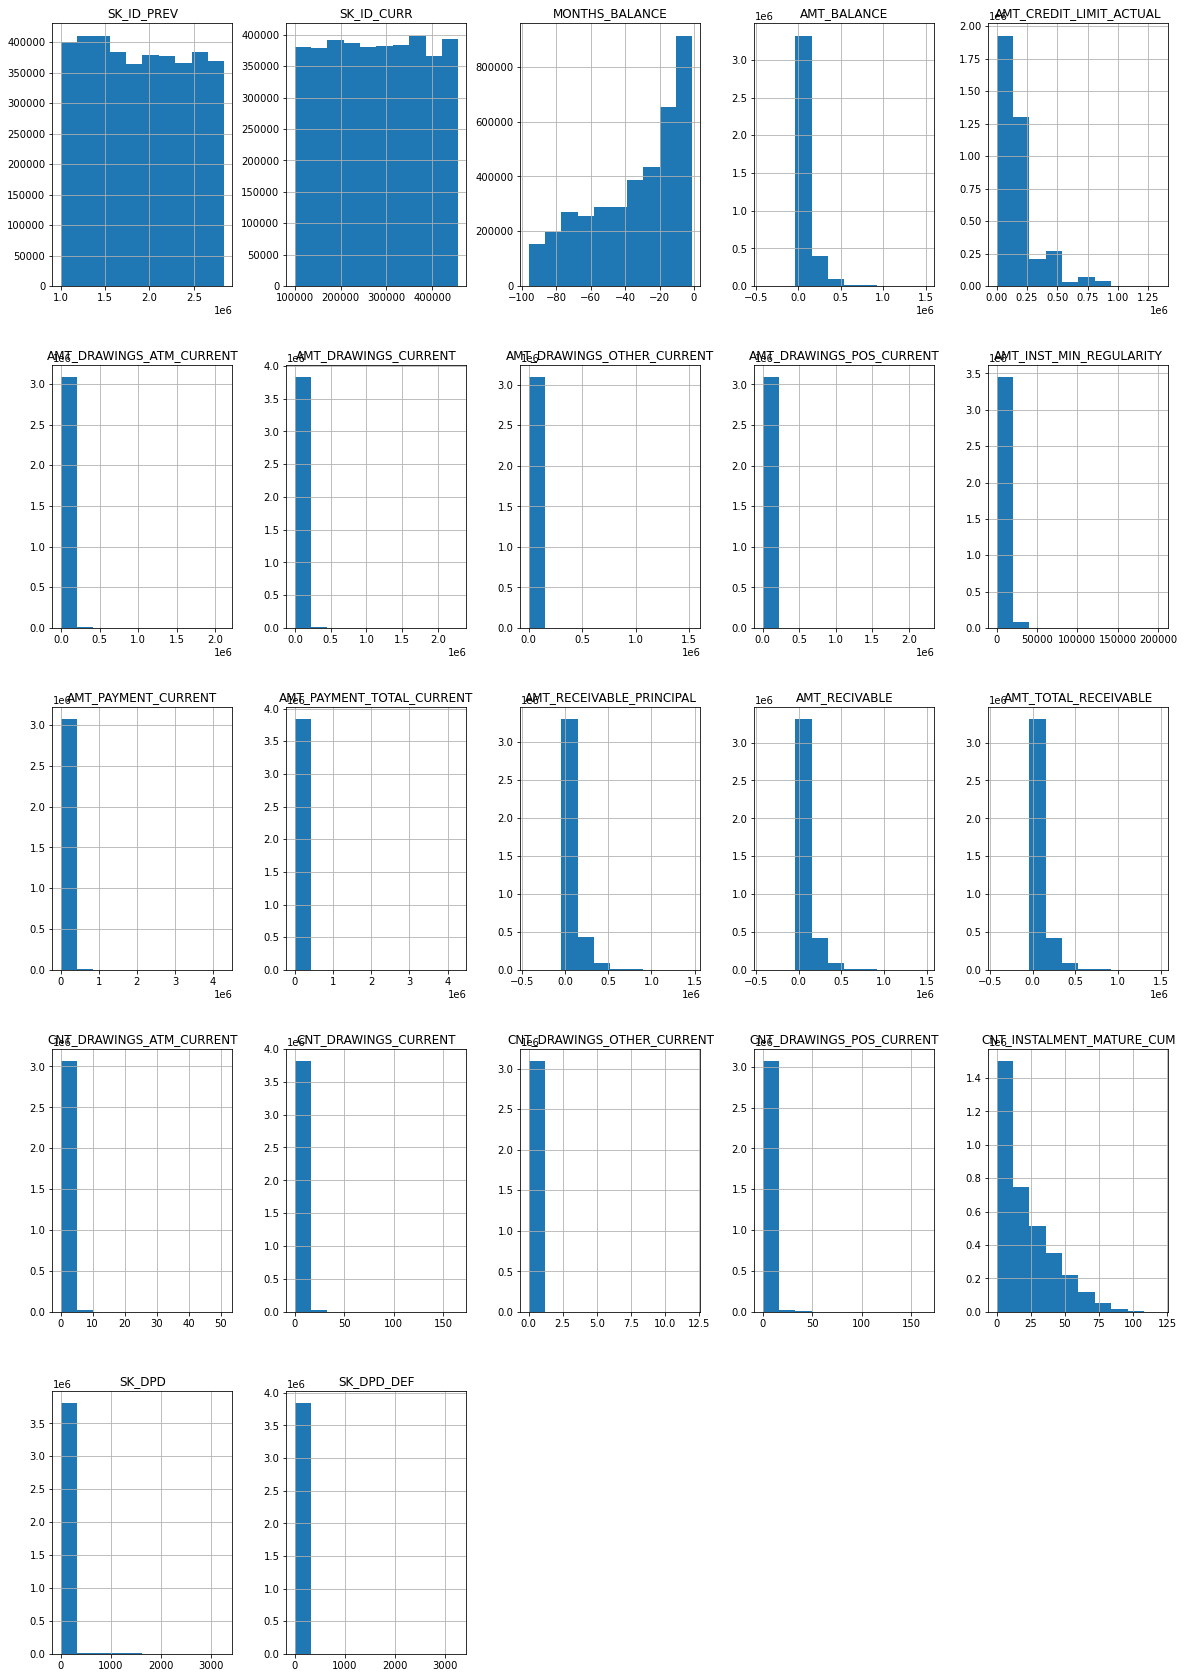

In [39]:


df_credit = datasets['credit_card_balance']
basic_eda(df_credit, 'credit_card_balance')



In [40]:
len(bureau_df['SK_ID_CURR'].unique())


305811

### InstallmentPayments Data


************************** installments_payments ******************************

Performing basic EDA on installments_payments dataset

* The dataset has 13605401 rows and 8 columns.

* First 10 rows of the dataset:



,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470



* Describing the dataset statistics:



,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06



* Fetching info of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


None


* Check data distribution: 


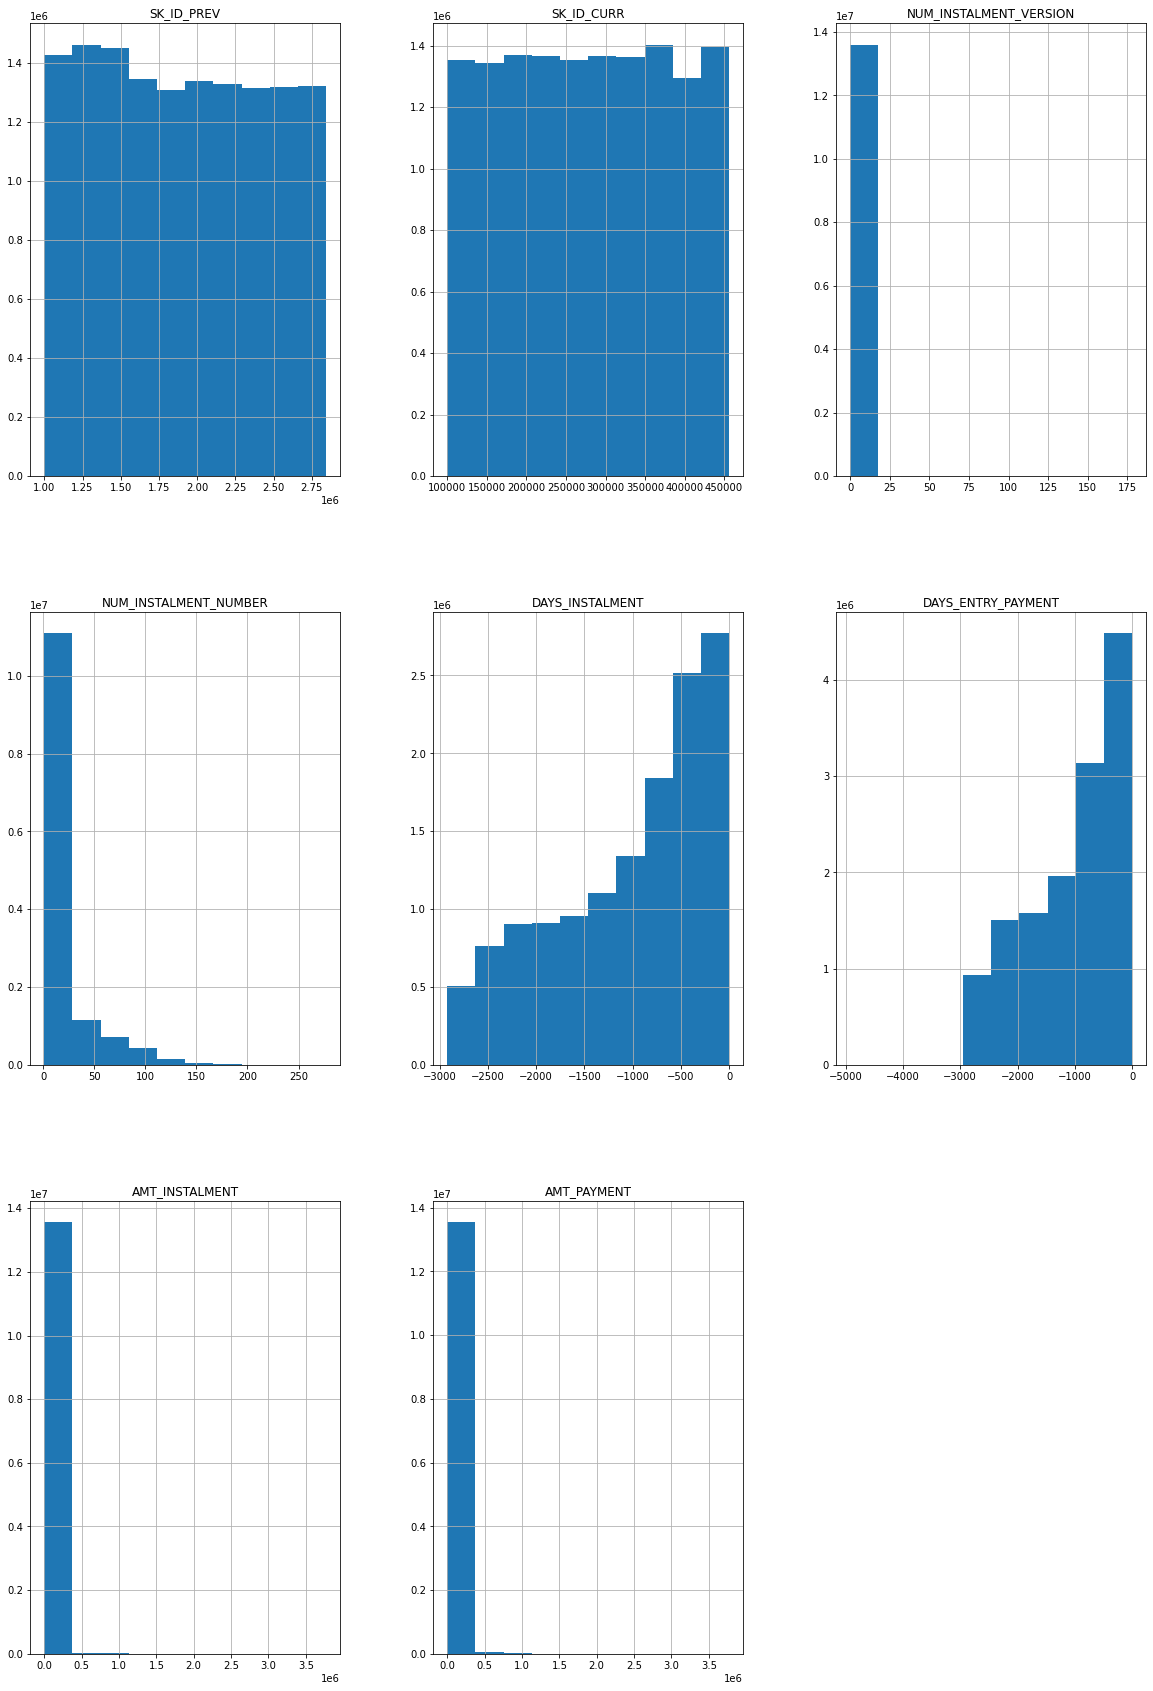

In [41]:


df_installments = datasets['installments_payments']
basic_eda(df_installments, 'installments_payments')



# Feature Engineering

In [42]:
# Dictionary of Final Data sets

final_ds_names = ("bureau_final","credit_card_balance_final","installments_payments_final",
            "previous_application_final","POS_CASH_balance_final")

final_ds = dict()



## Excess Loan Feature

In [43]:

# Create a feature to see if the loan amount is larger than the value of the underlying goods

app_train['EXCESS_LOAN'] = app_train['AMT_CREDIT'] - app_train['AMT_GOODS_PRICE']


app_train['EXCESS_LOAN'].mask(app_train['EXCESS_LOAN']<0, 0, inplace=True)




## Flag Document Counts

In [44]:
flag_docs = ['SK_ID_CURR']
for cols in app_train.columns:
    if cols[0:8] == 'FLAG_DOC':
        flag_docs.append(cols)
        
flag_df = app_train[flag_docs]
flag_pivot = flag_df.melt(id_vars = 'SK_ID_CURR', var_name = 'Document', value_name = "FLAG_DOCS_SUBMITTED")
flag_counts = flag_pivot.groupby('SK_ID_CURR').sum()
flag_counts.head()




,FLAG_DOCS_SUBMITTED
SK_ID_CURR,
100002,1
100003,1
100004,0
100006,1
100007,1


## Income Per Family

In [45]:
app_train_final = pd.merge(app_train, flag_counts, 'left', 'SK_ID_CURR')
app_train_final['INCOME_PER_FAMILY_MEMBER'] = app_train_final['AMT_INCOME_TOTAL']/app_train_final['CNT_FAM_MEMBERS']


app_train_final['DEBT_TO_INCOME'] = app_train_final['AMT_ANNUITY'] / (app_train_final['AMT_INCOME_TOTAL'] / 12)



In [46]:
app_train_final.head(15)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXCESS_LOAN,FLAG_DOCS_SUBMITTED,INCOME_PER_FAMILY_MEMBER,DEBT_TO_INCOME
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,55597.5,1,202500.0000,1.463733
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,164002.5,1,135000.0000,1.586600
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,67500.0000,1.200000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,15682.5,1,67500.0000,2.638800
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,121500.0000,2.159556
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0.0,0.0,0.0,0.0,1.0,1.0,35995.5,1,49500.0000,3.335455
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0.0,0.0,0.0,1.0,1.0,2.0,165726.0,2,57000.0000,2.898316
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,180000.0000,1.402500
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0.0,0.0,0.0,0.0,0.0,1.0,106110.0,1,56250.0000,3.608160
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,135000.0000,1.800000


## Adding the same above features to the test data

In [47]:
app_test = datasets['application_test']

app_test['EXCESS_LOAN'] = app_test['AMT_CREDIT'] - app_test['AMT_GOODS_PRICE']
app_test['EXCESS_LOAN'].mask(app_test['EXCESS_LOAN']<0, 0, inplace=True)
app_test.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXCESS_LOAN
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,118800.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,42768.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,33264.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [48]:


flag_docs = ['SK_ID_CURR']
for cols in app_test.columns:
    if cols[0:8] == 'FLAG_DOC':
        flag_docs.append(cols)
        
flag_df = app_test[flag_docs]
flag_pivot = flag_df.melt(id_vars = 'SK_ID_CURR', var_name = 'Document', value_name = "FLAG_DOCS_SUBMITTED")
flag_counts = flag_pivot.groupby('SK_ID_CURR').sum()
flag_counts.head()



,FLAG_DOCS_SUBMITTED
SK_ID_CURR,
100001,1
100005,1
100013,1
100028,1
100038,1


In [49]:
app_test_final = pd.merge(app_test, flag_counts, 'left', 'SK_ID_CURR')


app_test_final['INCOME_PER_FAMILY_MEMBER'] = app_test_final['AMT_INCOME_TOTAL']/app_test_final['CNT_FAM_MEMBERS']



app_test_final['DEBT_TO_INCOME'] = app_test_final['AMT_ANNUITY'] / (app_test_final['AMT_INCOME_TOTAL'] / 12)



In [50]:
app_test_final.head(15)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXCESS_LOAN,FLAG_DOCS_SUBMITTED,INCOME_PER_FAMILY_MEMBER,DEBT_TO_INCOME
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,118800.0,1,67500.0,1.827600
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,3.0,42768.0,1,49500.0,2.105455
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,1.0,4.0,33264.0,1,101250.0,4.134933
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1,78750.0,1.867371
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,60000.0,2.137800
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0.0,0.0,0.0,0.0,1.0,2.0,149688.0,1,135000.0,1.537800
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0.0,0.0,0.0,0.0,0.0,1.0,125721.0,1,45000.0,1.474500
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,166500.0,1.024865
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0.0,0.0,0.0,0.0,0.0,5.0,49896.0,1,157500.0,1.103143
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,54000.0,0.395333


## OHE on Categorical features

In [51]:


df_pos_cash_latest_status = df_pos_cash_latest[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_STATUS']]
df_pos_cash_latest_status.head()



,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS
45995,1000001,158271,Completed
2792302,1000002,101962,Completed
7085917,1000003,252457,Active
4078063,1000004,260094,Completed
7852623,1000005,176456,Completed


In [52]:


df_dummies = pd.get_dummies(df_pos_cash_latest_status['NAME_CONTRACT_STATUS'])
df_dummies.head()



,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
45995,0,0,0,0,1,0,0,0
2792302,0,0,0,0,1,0,0,0
7085917,1,0,0,0,0,0,0,0
4078063,0,0,0,0,1,0,0,0
7852623,0,0,0,0,1,0,0,0


In [53]:


df_pos_cash_latest_status = pd.concat([df_pos_cash_latest_status,df_dummies] , axis=1, sort=False)
df_pos_cash_latest_status.head()



,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
45995,1000001,158271,Completed,0,0,0,0,1,0,0,0
2792302,1000002,101962,Completed,0,0,0,0,1,0,0,0
7085917,1000003,252457,Active,1,0,0,0,0,0,0,0
4078063,1000004,260094,Completed,0,0,0,0,1,0,0,0
7852623,1000005,176456,Completed,0,0,0,0,1,0,0,0


In [54]:


d = {
    'SK_ID_PREV':['size'],
    'CNT_INSTALMENT_FUTURE':['min'],
    'CNT_INSTALMENT':['max']
    
}
df_agg = df_pos_cash.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg(d)


df_agg.columns = df_agg.columns.droplevel()

df_agg.reset_index(inplace=True)

df_agg.columns=['SK_ID_CURR','SK_ID_PREV','Count','Remaining_repays','Initial_term']
display(df_agg.head())



,SK_ID_CURR,SK_ID_PREV,Count,Remaining_repays,Initial_term
0,100001,1369693,5,0.0,4.0
1,100001,1851984,4,0.0,4.0
2,100002,1038818,19,6.0,24.0
3,100003,1810518,8,0.0,12.0
4,100003,2396755,12,1.0,12.0


In [55]:


df_final = pd.merge(df_agg,df_pos_cash_latest_status,how='left')



In [56]:
df_final.head()

,SK_ID_CURR,SK_ID_PREV,Count,Remaining_repays,Initial_term,NAME_CONTRACT_STATUS,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
0,100001,1369693,5,0.0,4.0,Completed,0,0,0,0,1,0,0,0
1,100001,1851984,4,0.0,4.0,Completed,0,0,0,0,1,0,0,0
2,100002,1038818,19,6.0,24.0,Active,1,0,0,0,0,0,0,0
3,100003,1810518,8,0.0,12.0,Completed,0,0,0,0,1,0,0,0
4,100003,2396755,12,1.0,12.0,Active,1,0,0,0,0,0,0,0


In [57]:


d2 = {
    'SK_ID_PREV':['size'],
    'Remaining_repays':['sum'],
    'Initial_term':  ['min','max'],
    'Active':        ['sum'],
    'Amortized debt':['sum'],
    'Approved':      ['sum'],
    'Canceled':      ['sum'],
    'Completed':     ['sum'],
    'Demand':        ['sum'],
    'Returned to the store':['sum'],
    'Signed':        ['sum']
}
df_out = df_final.groupby('SK_ID_CURR').agg(d2)

# display(df_out.head())

df_out.columns = df_out.columns.droplevel()

df_out.reset_index(inplace=True)

df_out.columns=['SK_ID_CURR','Count','Total_Remaining_repays','Min_Initial_term','Max_Initial_term','Active','Amortized debt','Approved','Canceled','Completed','Demand','Returned to the store','Signed']
display(df_out.head())



,SK_ID_CURR,Count,Total_Remaining_repays,Min_Initial_term,Max_Initial_term,Active,Amortized debt,Approved,Canceled,Completed,Demand,Returned to the store,Signed
0,100001,2,0.0,4.0,4.0,0,0,0,0,2,0,0,0
1,100002,1,6.0,24.0,24.0,1,0,0,0,0,0,0,0
2,100003,3,1.0,6.0,12.0,1,0,0,0,2,0,0,0
3,100004,1,0.0,4.0,4.0,0,0,0,0,1,0,0,0
4,100005,1,0.0,12.0,12.0,0,0,0,0,1,0,0,0


In [58]:


final_ds['POS_CASH_balance_final'] = df_out



In [59]:
cat_features = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS']
df_prev_app_new_cat = df_prev_app_new[cat_features]

imputed = SimpleImputer(fill_value='missing', strategy='constant').fit_transform(df_prev_app_new_cat) 

ohe = OneHotEncoder().fit(imputed)
cat = pd.DataFrame(ohe.transform(imputed).toarray(
            ), index=df_prev_app_new_cat.index, columns=list(ohe.get_feature_names(cat_features)))

cat.columns=['Cashloans', 'Consumerloans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer']
cat.head()

,Cashloans,Consumerloans,Revolvingloans,XNA,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY,Approved,Canceled,Refused,Unusedoffer
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Aggregation by loan types

In [60]:


df_prev_app_new= pd.concat([df_prev_app_new,cat], axis=1)

d = {
 'Cashloans'     : ['sum'],
 'Consumerloans' : ['sum'],
 'Revolvingloans': ['sum'],
 'XNA'            : ['sum'],
 'FRIDAY'         : ['sum'],
 'MONDAY'         : ['sum'],
 'SATURDAY'       : ['sum'],
 'SUNDAY'         : ['sum'],
 'THURSDAY'       : ['sum'],
 'TUESDAY'        : ['sum'],
 'WEDNESDAY'      : ['sum'],
 'Approved'       : ['sum'],
 'Canceled'       : ['sum'],
 'Refused'        : ['sum'],
 'Unusedoffer'   : ['sum'],
 'SK_ID_PREV'                 : ['size'],
 'AMT_ANNUITY'                : ['min','max','mean'],
 'AMT_APPLICATION'            : ['min','max','mean'],
 'DAYS_DECISION'              : ['min','max','mean'],
}


df_out = df_prev_app_new.groupby(by='SK_ID_CURR').agg(d)

df_out.columns = df_out.columns.droplevel()

df_out.reset_index(inplace=True)

df_out.columns= ['SK_ID_CURR','Cash loans', 'Consumer loans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 'Tot_AMT_ANNUITY_min', 'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 'Tot_AMT_APPLICATION_max', 'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 'DAYS_DECISION_mean']
display(df_out.head())


,SK_ID_CURR,Cash loans,Consumer loans,Revolvingloans,XNA,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,...,Total_records,Tot_AMT_ANNUITY_min,Tot_AMT_ANNUITY_max,Tot_AMT_ANNUITY_mean,Tot_AMT_APPLICATION_min,Tot_AMT_APPLICATION_max,Tot_AMT_APPLICATION_mean,DAYS_DECISION_min,DAYS_DECISION_max,DAYS_DECISION_mean
0,100001,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3951.000,3951.000,3951.000,24835.5,24835.5,24835.50,-1740,-1740,-1740.0
1,100002,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,9251.775,9251.775,9251.775,179055.0,179055.0,179055.00,-606,-606,-606.0
2,100003,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,6737.310,98356.995,56553.990,68809.5,900000.0,435436.50,-2341,-746,-1305.0
3,100004,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,5357.250,5357.250,5357.250,24282.0,24282.0,24282.00,-815,-815,-815.0
4,100005,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2,4813.200,4813.200,4813.200,0.0,44617.5,22308.75,-757,-315,-536.0


In [61]:
final_ds['previous_application_final'] = df_out

## Late Payments

In [62]:


# Avg_installment_days_difference and Avg_installment_amount_difference
# Let's start with the bureau balance dataset first

bb_df = datasets['bureau_balance']



In [63]:


## We are going to focus on the number of months that had a late payment

tot_month_counts = bb_df.groupby('SK_ID_BUREAU').count()['STATUS']
late_month_counts = bb_df[(bb_df['STATUS'] != '0') & (bb_df['STATUS'] != 'C') & (bb_df['STATUS'] != 'X')].groupby('SK_ID_BUREAU').count()['STATUS']
status_df = pd.merge(left = tot_month_counts, right = late_month_counts, how = 'left', on = "SK_ID_BUREAU", suffixes = ('_tot', '_late'))

status_df.fillna(0, inplace = True)
status_df.head()



,STATUS_tot,STATUS_late
SK_ID_BUREAU,,
5001709,97,0.0
5001710,83,0.0
5001711,4,0.0
5001712,19,0.0
5001713,22,0.0


In [64]:


## Now let's work on the bureau dataset

bureau_df = datasets['bureau']
bureau_df.head()



,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [65]:


## Pick out just the credit card data

cc_debt_df = bureau_df[bureau_df['CREDIT_TYPE'] == 'Credit card']
cc_debt_df.drop(cc_debt_df.columns.difference(['SK_ID_CURR','CREDIT_TYPE', 'AMT_CREDIT_SUM_DEBT']), 1, inplace=True)
cc_debt_df = cc_debt_df.groupby('SK_ID_CURR').sum()
cc_debt_df.rename({'SK_ID_CURR': 'SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT': 'CREDIT_CARD_DEBT'}, axis = 1, inplace = True)
cc_debt_df.head()



,CREDIT_CARD_DEBT
SK_ID_CURR,
100002,0.0
100003,0.0
100005,0.0
100009,326628.0
100011,0.0


## Active Loans

In [66]:
## Count how many active loans the applicant has when they are applying for the Home Credit loan

active_df = bureau_df[bureau_df['CREDIT_ACTIVE'] == 'Active']
active_df.drop(active_df.columns.difference(['SK_ID_CURR','CREDIT_ACTIVE']), 1, inplace=True)
active_df = active_df.groupby('SK_ID_CURR').count()
active_df.rename({'SK_ID_CURR': 'SK_ID_CURR', 'CREDIT_ACTIVE': 'TOTAL_ACTIVE_LOANS'}, axis = 1, inplace = True)
active_df.head()

,TOTAL_ACTIVE_LOANS
SK_ID_CURR,
100001,3
100002,2
100003,1
100005,2
100008,1


In [67]:
bureau_df.drop(bureau_df.columns.difference(['SK_ID_CURR','AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'SK_ID_BUREAU']), 1, inplace=True)


## combine the bureau dataset with the late payment info from bureau_balance dataset

combined_bureau_df = pd.merge(bureau_df, status_df, 'left','SK_ID_BUREAU')



combined_bureau_df.drop('SK_ID_BUREAU', inplace = True, axis = 1)


combined_bureau_df = combined_bureau_df.groupby('SK_ID_CURR').sum()

bureau_final = pd.merge(combined_bureau_df, active_df, 'left', 'SK_ID_CURR')
bureau_final = pd.merge(bureau_final, cc_debt_df, 'left', 'SK_ID_CURR')
## transform/combine several features into new ones

bureau_final['Percent_Late'] = bureau_final['STATUS_late']/bureau_final['STATUS_tot']
bureau_final['PERCENT_CREDIT_CARD'] = bureau_final['CREDIT_CARD_DEBT']/bureau_final['AMT_CREDIT_SUM_DEBT']


bureau_final.drop(['STATUS_tot', 'STATUS_late', 'CREDIT_CARD_DEBT'], axis = 1, inplace = True)



## Make the columns headers more descriptive

bureau_final.rename({'AMT_CREDIT_SUM_DEBT': 'TOTAL_DEBT', 'AMT_CREDIT_SUM_OVERDUE': 'TOTAL_DEBT_OVERDUE', 'TOTAL_ACTIVE_LOANS': 'TOTAL_NUMBER_OF_ACTIVE_LOANS', 'Percent_Late': 'PERCENT_LATE'}, axis = 1, inplace = True)
bureau_final['PERCENT_CREDIT_CARD'] = bureau_final['PERCENT_CREDIT_CARD'].fillna(0)
bureau_final['TOTAL_NUMBER_OF_ACTIVE_LOANS'] = bureau_final['TOTAL_NUMBER_OF_ACTIVE_LOANS'].fillna(0)
bureau_final.head()



,TOTAL_DEBT,TOTAL_DEBT_OVERDUE,TOTAL_NUMBER_OF_ACTIVE_LOANS,PERCENT_LATE,PERCENT_CREDIT_CARD
SK_ID_CURR,,,,,
100001,596686.5,0.0,3.0,0.005814,0.0
100002,245781.0,0.0,2.0,0.245455,0.0
100003,0.0,0.0,1.0,NaN,0.0
100004,0.0,0.0,0.0,NaN,0.0
100005,568408.5,0.0,2.0,0.000000,0.0


In [68]:
final_ds['bureau_final'] = bureau_final

In [69]:


df_installments['installment_days_difference']=df_installments['DAYS_ENTRY_PAYMENT']-df_installments['DAYS_INSTALMENT']
df_installments['installment_amount_difference']=df_installments['AMT_PAYMENT']-df_installments['AMT_INSTALMENT']
df_installments.head()



,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,installment_days_difference,installment_amount_difference
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,-7.0,0.000
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525,0.0,0.000
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000,0.0,0.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130,-8.0,0.000
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585,17.0,-4.455


In [70]:
d = {
    'installment_days_difference':['mean'],
    'installment_amount_difference':['mean']
    
}
df_ins_agg = df_installments.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg(d)
# display(df_ins_agg.head())

df_ins_agg.columns = df_ins_agg.columns.droplevel()
# display(df_ins_agg.head())
df_ins_agg.reset_index(inplace=True)
# display(df_ins_agg.head())
df_ins_agg.columns=['SK_ID_CURR','SK_ID_PREV','Avg_installment_days_difference', 'Avg_installment_amount_difference']
display(df_ins_agg.head())

,SK_ID_CURR,SK_ID_PREV,Avg_installment_days_difference,Avg_installment_amount_difference
0,100001,1369693,-15.500000,0.0
1,100001,1851984,3.666667,0.0
2,100002,1038818,-20.421053,0.0
3,100003,1810518,-4.428571,0.0
4,100003,2396755,-6.750000,0.0


In [71]:
d2 = {
    'Avg_installment_days_difference':['mean'],
    'Avg_installment_amount_difference':['mean']
}
df_ins_out = df_ins_agg.groupby('SK_ID_CURR').agg(d2)

# display(df_ins_out.head())

df_ins_out.columns = df_ins_out.columns.droplevel()

df_ins_out.reset_index(inplace=True)

df_ins_out.columns=['SK_ID_CURR','Avg_installment_days_difference', 'Avg_installment_amount_difference']
display(df_ins_out.head())

,SK_ID_CURR,Avg_installment_days_difference,Avg_installment_amount_difference
0,100001,-5.916667,0.0
1,100002,-20.421053,0.0
2,100003,-7.448413,0.0
3,100004,-7.666667,0.0
4,100005,-23.555556,0.0


In [72]:
final_ds['installments_payments_final'] = df_ins_out

## Percent of Late Payments

In [73]:


tot_month_counts = df_credit.groupby('SK_ID_PREV').count()['MONTHS_BALANCE']
late_month_counts = df_credit[(df_credit['SK_DPD'] != 0)].groupby('SK_ID_PREV').count()['SK_DPD']
df_credit_late = pd.merge(left = tot_month_counts, right = late_month_counts, how = 'left', on = "SK_ID_PREV")

df_credit_late.fillna(0, inplace = True)
df_credit_late.head()



,MONTHS_BALANCE,SK_DPD
SK_ID_PREV,,
1000018,5,0.0
1000030,8,0.0
1000031,16,0.0
1000035,5,0.0
1000077,11,0.0


In [74]:


df_credit_late['Payment_Pass_Due_Perc'] = df_credit_late['SK_DPD']/df_credit_late['MONTHS_BALANCE']
df_credit_late.head()



,MONTHS_BALANCE,SK_DPD,Payment_Pass_Due_Perc
SK_ID_PREV,,,
1000018,5,0.0,0.0
1000030,8,0.0,0.0
1000031,16,0.0,0.0
1000035,5,0.0,0.0
1000077,11,0.0,0.0


In [75]:


d = {
    'AMT_BALANCE':['mean'],
    'AMT_CREDIT_LIMIT_ACTUAL':['mean'],
    'AMT_PAYMENT_TOTAL_CURRENT':['mean'],
    
}
df_credit_agg = df_credit.groupby(['SK_ID_CURR','SK_ID_PREV']).agg(d)


df_credit_agg.columns = df_credit_agg.columns.droplevel()

df_credit_agg.reset_index(inplace=True)

df_credit_agg.columns=['SK_ID_CURR', 'SK_ID_PREV','CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments']
display(df_credit_agg.head())



,SK_ID_CURR,SK_ID_PREV,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments
0,100006,1489396,0.000000,270000.000000,0.000000
1,100011,1843384,54482.111149,164189.189189,4520.067568
2,100013,2038692,18159.919219,131718.750000,6817.172344
3,100021,2594025,0.000000,675000.000000,0.000000
4,100023,1499902,0.000000,135000.000000,0.000000


In [76]:


combined_credit_df = pd.merge(df_credit_agg, df_credit_late, 'left','SK_ID_PREV')
#combined_credit_df.head()
dropped_credit_df=combined_credit_df.drop(columns=['MONTHS_BALANCE', 'SK_DPD'])
dropped_credit_df.head()



,SK_ID_CURR,SK_ID_PREV,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments,Payment_Pass_Due_Perc
0,100006,1489396,0.000000,270000.000000,0.000000,0.000000
1,100011,1843384,54482.111149,164189.189189,4520.067568,0.000000
2,100013,2038692,18159.919219,131718.750000,6817.172344,0.010417
3,100021,2594025,0.000000,675000.000000,0.000000,0.000000
4,100023,1499902,0.000000,135000.000000,0.000000,0.000000


In [77]:


d2 = {
    'CC_Average_Monthly_Balance':['sum'],
    'CC_Average_Credit_Card_Limit':['mean'],
    'CC_Average_Monthly_Payments':['sum'],
    'Payment_Pass_Due_Perc': ['mean']
    
}
df_credit_out = dropped_credit_df.groupby('SK_ID_CURR').agg(d2)

# display(df_out.head())

df_credit_out.columns = df_credit_out.columns.droplevel()

df_credit_out.reset_index(inplace=True)

df_credit_out.columns=['SK_ID_CURR','CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments', 'CC_Average_percentage_pass_due']
display(df_credit_out.head())



,SK_ID_CURR,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments,CC_Average_percentage_pass_due
0,100006,0.000000,270000.000000,0.000000,0.000000
1,100011,54482.111149,164189.189189,4520.067568,0.000000
2,100013,18159.919219,131718.750000,6817.172344,0.010417
3,100021,0.000000,675000.000000,0.000000,0.000000
4,100023,0.000000,135000.000000,0.000000,0.000000


## Final Data sets after Feature Engineering

In [78]:


final_ds['credit_card_balance_final'] = df_credit_out



In [79]:
for i in final_ds.keys():
    print(i, " shape: ", final_ds[i].shape)

POS_CASH_balance_final  shape:  (337252, 13)
previous_application_final  shape:  (338857, 26)
bureau_final  shape:  (305811, 5)
installments_payments_final  shape:  (339587, 3)
credit_card_balance_final  shape:  (103558, 5)


In [80]:
# save files into a pickle file to save running time
import pickle 
with open('final_datasets.pickle', 'wb') as f:
    pickle.dump(final_ds, f, protocol=pickle.HIGHEST_PROTOCOL)

In [81]:


# load datasets from a pickle file
import pickle 
with open('final_datasets.pickle', 'rb') as f:
    final_ds = pickle.load(f)



# HCDR Preprocessing

## Selecting HIghly corelated features

In [82]:
correlations = app_train.corr()['TARGET'].sort_values()
num_of_features = 20


## Selected Features

In [83]:
# +1 in tail() so that TARGET is not considered in num_of_features
selected_features = list(correlations.tail(num_of_features//2 + 1).index) + list(correlations.head(num_of_features//2).index)
selected_features.remove('TARGET')

# We don't have any categorical features in the highly correlated features. Hence we selected these 7 categorical features manually
categoricals = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

selected_features = selected_features + categoricals
print()
print("Selected features= ", selected_features)




Selected features=  ['FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE']


In [84]:
# Split the provided training data into training and validation. Not creating test dataset as test dataset is separate

from sklearn.model_selection import train_test_split

use_application_data_ONLY = False #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test= datasets["application_test"][selected_features]
else:
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15,  random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test= datasets["application_test"][selected_features]

print(f"X train           shape: {X_train.shape}")
print(f"Y train           shape: {y_train.shape}")
print()
print(f"X validation      shape: {X_valid.shape}")
print(f"Y validation      shape: {y_valid.shape}")
print()
print(f"X test            shape: {X_test.shape}")
print(f"Y test            shape: {y_test.shape}")
print()
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

X train           shape: (222176, 27)
Y train           shape: (222176,)

X validation      shape: (46127, 27)
Y validation      shape: (46127,)

X test            shape: (39208, 27)
Y test            shape: (39208,)

X X_kaggle_test   shape: (48744, 27)


# Pipeline Creation

In [85]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [86]:
# seperate the featured into numerical and catagorical for pipelines

num_attribs = [ 'FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 
               'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 
               'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 
               'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE' ]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])          


In [87]:
def pct(x):
    return round(100*x,3)
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC",
                                   "Train Time"
                                  ])

# Model 0: Baseline Logistic Model

In [88]:


from time import time
start = time()

full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])


model_0 = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time() - start, 4)



In [89]:


from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, model_0.predict(X_train)), 3)



0.92

In [90]:

x=len(expLog)
expLog.drop(index=range(0,x),axis=0,inplace=True)
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time


In [91]:


from sklearn.metrics import accuracy_score, roc_auc_score

exp_name = f"Baseline_Logistic_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_0.predict(X_train)), 
                accuracy_score(y_valid, model_0.predict(X_valid)),
                accuracy_score(y_test, model_0.predict(X_test)), 
                roc_auc_score(y_train, model_0.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_0.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_0.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog



,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363


In [92]:
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363


## Merge Additional Data Sets

In [93]:
# Merge additional datasetswith X_train, y_train, X_val, y_val
print(datasets["application_train"].head())
selected_features = ['SK_ID_CURR','TARGET'] + selected_features
df_train_selected = datasets["application_train"][selected_features]


selected_features.remove('TARGET')
df_test_selected  = datasets["application_test"][selected_features]
df_train_selected.columns

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0             

Index(['SK_ID_CURR', 'TARGET', 'FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI',
       'CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE'],
      dtype='object')

In [94]:
print(datasets["application_test"].columns)

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'EXCESS_LOAN'],
      dtype='object', length=122)


In [95]:


print("Train: ", df_train_selected.shape)
print("Test: ",  df_test_selected.shape)



Train:  (307511, 29)
Test:  (48744, 28)


In [96]:


# Merge all 6 additional datasets to the training and testing sets

def merge_additional(df):
    df = pd.merge(df, final_ds['POS_CASH_balance_final'][['SK_ID_CURR','Count','Total_Remaining_repays','Max_Initial_term']], 
                         'left', on='SK_ID_CURR')
    print("Merged POS_CASH_balance: ",  df.shape)

    df = pd.merge(df, final_ds['bureau_final'], 'left',  on='SK_ID_CURR')
    print("Merged bureau: ",  df.shape)

    df = pd.merge(df, final_ds['installments_payments_final'], 'left', on='SK_ID_CURR')
    print("Merged installments_payments: ",  df.shape)
    
    df = pd.merge(df, final_ds['previous_application_final'], 'left', on='SK_ID_CURR')
    print("Merged previous_application_final: ",  df.shape)
    
    df = pd.merge(df, final_ds['credit_card_balance_final'], 'left', on='SK_ID_CURR')
    print("Merged credit_card_balance_final: ",  df.shape)
    
    return df



In [97]:
df_train_selected = merge_additional(df_train_selected)
df_test_selected = merge_additional(df_test_selected)

Merged POS_CASH_balance:  (307511, 32)
Merged bureau:  (307511, 37)
Merged installments_payments:  (307511, 39)
Merged previous_application_final:  (307511, 64)
Merged credit_card_balance_final:  (307511, 68)
Merged POS_CASH_balance:  (48744, 31)
Merged bureau:  (48744, 36)
Merged installments_payments:  (48744, 38)
Merged previous_application_final:  (48744, 63)
Merged credit_card_balance_final:  (48744, 67)


In [98]:


print("Train: ", df_train_selected.shape)
print("Test: ",  df_test_selected.shape)



Train:  (307511, 68)
Test:  (48744, 67)


In [99]:
selected_features.remove('SK_ID_CURR')
selected_features = selected_features + ['Count',  'Total_Remaining_repays',  'TOTAL_DEBT',  'Max_Initial_term',
                                         'TOTAL_DEBT_OVERDUE',  'TOTAL_NUMBER_OF_ACTIVE_LOANS',  'PERCENT_LATE',  
                                         'PERCENT_CREDIT_CARD',  'Avg_installment_days_difference',  'Avg_installment_amount_difference',
                                         'Cash loans', 'Consumer loans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 
                                         'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 
                                         'Tot_AMT_ANNUITY_min', 'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 
                                         'Tot_AMT_APPLICATION_max', 'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 
                                         'DAYS_DECISION_mean', 'CC_Average_Monthly_Balance','CC_Average_Credit_Card_Limit', 'CC_Average_Monthly_Payments',
                                         'CC_Average_percentage_pass_due']


In [100]:
df_train_selected.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY',
       'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI',
       'CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'Count',
       'Total_Remaining_repays', 'Max_Initial_term', 'TOTAL_DEBT',
       'TOTAL_DEBT_OVERDUE', 'TOTAL_NUMBER_OF_ACTIVE_LOANS', 'PERCENT_LATE',
       'PERCENT_CREDIT_CARD', 'Avg_installment_days_difference',
       'Avg_installment_amount_difference', 'Cash loans', 'Consumer loans',
       'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY',
      

In [101]:
X_train = df_train_selected[selected_features]
y_train = df_train_selected['TARGET']
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15,  random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= df_test_selected[selected_features]

print(f"X train           shape: {X_train.shape}")
print(f"Y train           shape: {y_train.shape}")
print()
print(f"X validation      shape: {X_valid.shape}")
print(f"Y validation      shape: {y_valid.shape}")
print()
print(f"X test            shape: {X_test.shape}")
print(f"Y test            shape: {y_test.shape}")
print()
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")


X train           shape: (222176, 66)
Y train           shape: (222176,)

X validation      shape: (46127, 66)
Y validation      shape: (46127,)

X test            shape: (39208, 66)
Y test            shape: (39208,)

X X_kaggle_test   shape: (48744, 66)


In [102]:


new_cols = list()
for i in final_ds.keys():
#     print(final_ds[i].columns)
    new_cols += list(final_ds[i].columns)
new_cols



['SK_ID_CURR',
 'Count',
 'Total_Remaining_repays',
 'Min_Initial_term',
 'Max_Initial_term',
 'Active',
 'Amortized debt',
 'Approved',
 'Canceled',
 'Completed',
 'Demand',
 'Returned to the store',
 'Signed',
 'SK_ID_CURR',
 'Cash loans',
 'Consumer loans',
 'Revolvingloans',
 'XNA',
 'FRIDAY',
 'MONDAY',
 'SATURDAY',
 'SUNDAY',
 'THURSDAY',
 'TUESDAY',
 'WEDNESDAY',
 'Approved',
 'Canceled',
 'Refused',
 'Unusedoffer',
 'Total_records',
 'Tot_AMT_ANNUITY_min',
 'Tot_AMT_ANNUITY_max',
 'Tot_AMT_ANNUITY_mean',
 'Tot_AMT_APPLICATION_min',
 'Tot_AMT_APPLICATION_max',
 'Tot_AMT_APPLICATION_mean',
 'DAYS_DECISION_min',
 'DAYS_DECISION_max',
 'DAYS_DECISION_mean',
 'TOTAL_DEBT',
 'TOTAL_DEBT_OVERDUE',
 'TOTAL_NUMBER_OF_ACTIVE_LOANS',
 'PERCENT_LATE',
 'PERCENT_CREDIT_CARD',
 'SK_ID_CURR',
 'Avg_installment_days_difference',
 'Avg_installment_amount_difference',
 'SK_ID_CURR',
 'CC_Average_Monthly_Balance',
 'CC_Average_Credit_Card_Limit',
 'CC_Average_Monthly_Payments',
 'CC_Average_perce

In [103]:


X_train.head()



,FLAG_DOCUMENT_3,REG_CITY_NOT_LIVE_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_EMPLOYED,DAYS_BIRTH,...,Tot_AMT_APPLICATION_min,Tot_AMT_APPLICATION_max,Tot_AMT_APPLICATION_mean,DAYS_DECISION_min,DAYS_DECISION_max,DAYS_DECISION_mean,CC_Average_Monthly_Balance,CC_Average_Credit_Card_Limit,CC_Average_Monthly_Payments,CC_Average_percentage_pass_due
21614,1,0,1,0,-4533,0.0,3,3,-877.0,-12717,...,108261.0,108261.0,108261.0,-668.0,-668.0,-668.000000,NaN,NaN,NaN,NaN
209797,1,0,1,1,-3925,-828.0,2,2,-1298.0,-12307,...,114030.0,114030.0,114030.0,-828.0,-828.0,-828.000000,NaN,NaN,NaN,NaN
17976,1,0,0,0,-4899,-1762.0,2,2,NaN,-22406,...,0.0,180000.0,69082.5,-1762.0,-667.0,-1187.000000,26859.835946,103378.378378,915.725676,0.0
282543,1,0,1,1,-1176,0.0,2,2,-231.0,-8516,...,35928.0,68445.0,49791.0,-756.0,-636.0,-697.333333,NaN,NaN,NaN,NaN
52206,1,1,0,0,-4457,-1484.0,2,2,NaN,-15259,...,47245.5,47245.5,47245.5,-1484.0,-1484.0,-1484.000000,NaN,NaN,NaN,NaN


# Model 1 : Logistic Regression with Additional Features

In [104]:
# Logistic regression with our selected 66 features

num_attribs = ['FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 
               'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 
               'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 
               'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE',
               'Count',  'Total_Remaining_repays',  'TOTAL_DEBT',  'Max_Initial_term',
               'TOTAL_DEBT_OVERDUE',  'TOTAL_NUMBER_OF_ACTIVE_LOANS',  'PERCENT_LATE',  
               'PERCENT_CREDIT_CARD',  'Avg_installment_days_difference',  'Avg_installment_amount_difference',
               'Cash loans', 'Consumer loans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 
               'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 'Tot_AMT_ANNUITY_min', 
               'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 'Tot_AMT_APPLICATION_max', 
               'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 'DAYS_DECISION_mean','CC_Average_Monthly_Balance',
               'CC_Average_Credit_Card_Limit','CC_Average_Monthly_Payments','CC_Average_percentage_pass_due'
              ]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [105]:
from time import time
start = time()
 
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])


model_1 = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

In [106]:


from sklearn.metrics import accuracy_score, roc_auc_score

exp_name = f"LogisticRegression_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_1.predict(X_train)), 
                accuracy_score(y_valid, model_1.predict(X_valid)),
                accuracy_score(y_test, model_1.predict(X_test)), 
                roc_auc_score(y_train, model_1.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_1.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_1.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog



,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627


# Model 2: Hyperparameter Tuning with Gridsearch CV

In [107]:
from sklearn.model_selection import GridSearchCV

full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression(verbose = 1))
    ])

param_grid = {'linear__penalty':['l1','l2', 'elasticnet'], 
              'linear__C': [1, 10, 100, 1000, 10000]
             }


start = time()
model_2 = GridSearchCV(full_pipeline_with_predictor, param_grid, cv=10, n_jobs=4)

model_2.fit(X_train,y_train)
train_time = np.round(time() - start, 4)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s finished


In [108]:
exp_name = f"LogisticRegression_GSCV_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_2.predict(X_train)), 
                accuracy_score(y_valid, model_2.predict(X_valid)),
                accuracy_score(y_test, model_2.predict(X_test)), 
                roc_auc_score(y_train, model_2.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_2.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_2.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560


# Model 3: RandomForest

In [109]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, n_jobs=4, random_state=42)

start = time()

# %%time 
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("random_forest", rnd_clf)
    ])


model_3 = full_pipeline_with_predictor.fit(X_train, y_train)

train_time = np.round(time() - start, 4)

In [110]:
from sklearn.metrics import accuracy_score, roc_auc_score

exp_name = f"RamdomForest_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_3.predict(X_train)), 
                accuracy_score(y_valid, model_3.predict(X_valid)),
                accuracy_score(y_test, model_3.predict(X_test)), 
                roc_auc_score(y_train, model_3.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_3.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_3.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560
3,RamdomForest_66_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,35.6163


# Model 4: Random Forest Hyper Parameter Tuning

In [111]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
start = time()

full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("RandomForest", RandomForestClassifier())  # iterations=100,learning_rate=0.03,
    ])


params = {
    'RandomForest__n_estimators': [100],

    'RandomForest__max_depth': [5,10,15,20],
#     'RandomForest__max_features': [5,7,9]
}


rnd_clf = RandomizedSearchCV(full_pipeline_with_predictor, params, 
#                            n_iter=15, 
                             cv = 10, 
                             scoring='roc_auc', 
                             verbose=2, 
                             n_jobs=4)


cv_fit = rnd_clf.fit(X_train, y_train)
model_4 = cv_fit.best_estimator_
train_time = np.round(time() - start, 4)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [112]:


exp_name = f"RamdomForestCV_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_4.predict(X_train)), 
                accuracy_score(y_valid, model_4.predict(X_valid)),
                accuracy_score(y_test, model_4.predict(X_test)), 
                roc_auc_score(y_train, model_4.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_4.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_4.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog



,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560
3,RamdomForest_66_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,35.6163
4,RamdomForestCV_66_features,0.9199,0.9194,0.9160,0.8247,0.7545,0.7532,477.6412


# Model 5 : XgBoost

In [113]:
import xgboost as xgb
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("xgboost", xgb.XGBClassifier())
    ])

start = time()
model_5 = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

[10:34:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [114]:
exp_name = f"XGBoost_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_5.predict(X_train)), 
                accuracy_score(y_valid, model_5.predict(X_valid)),
                accuracy_score(y_test, model_5.predict(X_test)), 
                roc_auc_score(y_train, model_5.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_5.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_5.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560
3,RamdomForest_66_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,35.6163
4,RamdomForestCV_66_features,0.9199,0.9194,0.9160,0.8247,0.7545,0.7532,477.6412
5,XGBoost_66_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,13.8938


# Model 6: XGBoost with hyperparameter tuning

In [115]:
params = {
        'xgboost__min_child_weight': [1, 5, 10],
        'xgboost__gamma': [0.5, 1, 1.5, 2],
        }

start = time()
model_6 = GridSearchCV(full_pipeline_with_predictor, params, cv=10, n_jobs=4)

model_6.fit(X_train,y_train)
train_time = np.round(time() - start, 4)



[11:10:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [116]:
exp_name = f"XGBoost_GSCV_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_6.predict(X_train)), 
                accuracy_score(y_valid, model_6.predict(X_valid)),
                accuracy_score(y_test, model_6.predict(X_test)), 
                roc_auc_score(y_train, model_6.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_6.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_6.predict_proba(X_test)[:, 1]),
                train_time
                 ],4)) 

expLog


,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560
3,RamdomForest_66_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,35.6163
4,RamdomForestCV_66_features,0.9199,0.9194,0.9160,0.8247,0.7545,0.7532,477.6412
5,XGBoost_66_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,13.8938
6,XGBoost_GSCV_66_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,2128.6824


# Model 7: Ada Boost

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("AdaBoost", AdaBoostClassifier())
    ])

start = time()
model_7 = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

In [118]:
exp_name = f"AdaBoost_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_7.predict(X_train)), 
                accuracy_score(y_valid, model_7.predict(X_valid)),
                accuracy_score(y_test, model_7.predict(X_test)), 
                roc_auc_score(y_train, model_7.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_7.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_7.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560
3,RamdomForest_66_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,35.6163
4,RamdomForestCV_66_features,0.9199,0.9194,0.9160,0.8247,0.7545,0.7532,477.6412
5,XGBoost_66_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,13.8938
6,XGBoost_GSCV_66_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,2128.6824
7,AdaBoost_66_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,45.8151


# Model 8 : ADA BOOST with hyperparameter tuning.

In [119]:
params = {
    "AdaBoost__learning_rate": [0.01, 0.1, 0.001],
    "AdaBoost__n_estimators":[10, 30, 50, 100]
    }


start = time()
model_8 = GridSearchCV(full_pipeline_with_predictor, params, cv=10, n_jobs=4)

model_8.fit(X_train,y_train)
train_time = np.round(time() - start, 4)



In [120]:
exp_name = f"AdaBoost_GSCV_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_8.predict(X_train)), 
                accuracy_score(y_valid, model_8.predict(X_valid)),
                accuracy_score(y_test, model_8.predict(X_test)), 
                roc_auc_score(y_train, model_8.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_8.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_8.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560
3,RamdomForest_66_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,35.6163
4,RamdomForestCV_66_features,0.9199,0.9194,0.9160,0.8247,0.7545,0.7532,477.6412
5,XGBoost_66_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,13.8938
6,XGBoost_GSCV_66_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,2128.6824
7,AdaBoost_66_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,45.8151
8,AdaBoost_GSCV_66_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,1234.3497


# Model 9: Grad Boost

In [121]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("GradBoost", GradientBoostingClassifier())
    ])

start = time()
model_9 = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

In [122]:
exp_name = f"GradientBoost_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_9.predict(X_train)), 
                accuracy_score(y_valid, model_9.predict(X_valid)),
                accuracy_score(y_test, model_9.predict(X_test)), 
                roc_auc_score(y_train, model_9.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_9.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_9.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560
3,RamdomForest_66_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,35.6163
4,RamdomForestCV_66_features,0.9199,0.9194,0.9160,0.8247,0.7545,0.7532,477.6412
5,XGBoost_66_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,13.8938
6,XGBoost_GSCV_66_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,2128.6824
7,AdaBoost_66_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,45.8151
8,AdaBoost_GSCV_66_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,1234.3497
9,GradientBoost_66_features,0.9208,0.9197,0.9164,0.7729,0.7636,0.7626,207.8161


# MODEL 10 : Grad Boost with hyper parameter tuning

In [123]:
params = {
    "GradBoost__learning_rate": [0.01, 0.1, 0.001],
    "GradBoost__max_depth":[3,5,8],
    "GradBoost__max_features":["log2","sqrt"],
    "GradBoost__n_estimators":[10, 20, 50]
    }

start = time()
model_10 = GridSearchCV(full_pipeline_with_predictor, params, cv=10, n_jobs=4)

model_10.fit(X_train,y_train)
train_time = np.round(time() - start, 4)

In [124]:
exp_name = f"GradBoost_GSCV_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_10.predict(X_train)), 
                accuracy_score(y_valid, model_10.predict(X_valid)),
                accuracy_score(y_test, model_10.predict(X_test)), 
                roc_auc_score(y_train, model_10.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_10.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_10.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560
3,RamdomForest_66_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,35.6163
4,RamdomForestCV_66_features,0.9199,0.9194,0.9160,0.8247,0.7545,0.7532,477.6412
5,XGBoost_66_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,13.8938
6,XGBoost_GSCV_66_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,2128.6824
7,AdaBoost_66_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,45.8151
8,AdaBoost_GSCV_66_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,1234.3497
9,GradientBoost_66_features,0.9208,0.9197,0.9164,0.7729,0.7636,0.7626,207.8161


# Model 11: Lightgbm

In [125]:


import lightgbm as lg

params = {
    'n_estimators': 1000, 'learning_rate': 0.1, 'n_jobs': 4
}

full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ('mdl',  lg.LGBMClassifier(**params))
    ])

start = time()
model_11 = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

print("LGBM accuracy score: ", np.round(accuracy_score(y_train, model_11.predict(X_train)), 3))

print("LGBM roc_auc_score: ", roc_auc_score(y_train, model_11.predict_proba(X_train)[:, 1]))



LGBM accuracy score:  0.939
LGBM roc_auc_score:  0.9599107292047562


In [126]:
exp_name = f"Lightgbm_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_11.predict(X_train)), 
                accuracy_score(y_valid, model_11.predict(X_valid)),
                accuracy_score(y_test, model_11.predict(X_test)), 
                roc_auc_score(y_train, model_11.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_11.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_11.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560
3,RamdomForest_66_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,35.6163
4,RamdomForestCV_66_features,0.9199,0.9194,0.9160,0.8247,0.7545,0.7532,477.6412
5,XGBoost_66_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,13.8938
6,XGBoost_GSCV_66_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,2128.6824
7,AdaBoost_66_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,45.8151
8,AdaBoost_GSCV_66_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,1234.3497
9,GradientBoost_66_features,0.9208,0.9197,0.9164,0.7729,0.7636,0.7626,207.8161


In [127]:
expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560
3,RamdomForest_66_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,35.6163
4,RamdomForestCV_66_features,0.9199,0.9194,0.9160,0.8247,0.7545,0.7532,477.6412
5,XGBoost_66_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,13.8938
6,XGBoost_GSCV_66_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,2128.6824
7,AdaBoost_66_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,45.8151
8,AdaBoost_GSCV_66_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,1234.3497
9,GradientBoost_66_features,0.9208,0.9197,0.9164,0.7729,0.7636,0.7626,207.8161


# Model 12: Light GBM Tuned

In [128]:

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'reg_alpha': "{:.3f}".format(params['reg_alpha']),
        'reg_lambda': "{:.3f}".format(params['reg_lambda']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'learning_rate': '{:.3f}'.format(params['learning_rate']),
        'min_child_weight': int(params['min_child_weight']),
        'subsample': '{:.3f}'.format(params['subsample']),
    }
    
    full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ('mdl',  lg.LGBMClassifier(**params))
    ])

  
    
    gbm_model = full_pipeline_with_predictor.fit(X_train, y_train)
                        

    predictions = gbm_model.predict_proba(X_valid)[:, 1]
    score = roc_auc_score(y_valid, predictions)

    return {'loss': 1-score, 'status': STATUS_OK}


space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.3, 1.0, 0.1),
    'learning_rate': hp.quniform('learning_rate', 0.025, 0.1, 0.025),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'reg_alpha': hp.quniform('reg_alpha', 0.0, 1, 0.1),
    'reg_lambda': hp.quniform('reg_lambda', 0.0, 1, 0.1),

}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30)
print(best)


100%|██████████| 30/30 [02:05<00:00,  4.17s/trial, best loss: 0.2270010391531938]
{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 8.0, 'min_child_weight': 3.0, 'reg_alpha': 0.7000000000000001, 'reg_lambda': 0.8, 'subsample': 0.8500000000000001}


In [129]:
best = {'colsample_bytree': 0.30000000000000004
        ,'learning_rate': 0.1
        ,'max_depth': 6
        ,'min_child_weight': 1.0
        ,'reg_alpha': 0.7
        ,'reg_lambda': 0.1
        ,'subsample': 0.75}


best['max_depth'] = int(best['max_depth'])
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ('mdl',  lg.LGBMClassifier(n_estimators=1000, n_jobs = -1, **best))
    ])
model_12 = full_pipeline_with_predictor.fit(X_train, y_train)

In [130]:
exp_name = f"LightgbmTuned_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_12.predict(X_train)), 
                accuracy_score(y_valid, model_12.predict(X_valid)),
                accuracy_score(y_test, model_12.predict(X_test)), 
                roc_auc_score(y_train, model_12.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_12.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_12.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560
3,RamdomForest_66_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,35.6163
4,RamdomForestCV_66_features,0.9199,0.9194,0.9160,0.8247,0.7545,0.7532,477.6412
5,XGBoost_66_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,13.8938
6,XGBoost_GSCV_66_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,2128.6824
7,AdaBoost_66_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,45.8151
8,AdaBoost_GSCV_66_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,1234.3497
9,GradientBoost_66_features,0.9208,0.9197,0.9164,0.7729,0.7636,0.7626,207.8161


# Model 13: Neural Network

To hyperparameterise a neural network we can alter the values of the following variables:
- epochs
- learning rate
- batch size
- optimizers (adam, adagrad, sgdclassifier, etc.)
- no. of Dense, Batchnormalizatoin, Activation and dropout layers

In this case we got the best results when we set:
- epochs = 30
- batch size = 10
- optimizer = adagrad
- 5 Dense, Batchnormalizatoin, Activation layers and 4 dropout layers (please check the create model function in the cell below to see the architecture of the model.)

In [131]:
#Deep Learning Loads
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, InputLayer
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_selection import SelectFromModel


def create_model():
    md2 = Sequential()
    
    sha = 66
    InputLayer(input_shape=(None, 66))

    md2.add(Dense(sha, kernel_initializer="uniform"))
    md2.add(BatchNormalization())
    md2.add(Activation('relu'))
    md2.add(Dropout(0.2))

    md2.add(Dense(200, kernel_initializer="uniform"))
    md2.add(BatchNormalization())
    md2.add(Activation('relu'))
    md2.add(Dropout(0.2))

    md2.add(Dense(100, kernel_initializer="uniform"))
    md2.add(BatchNormalization())
    md2.add(Activation('relu'))
    md2.add(Dropout(0.2))

    md2.add(Dense(100, kernel_initializer="uniform"))
    md2.add(BatchNormalization())
    md2.add(Activation('relu'))
    md2.add(Dropout(0.2))


    md2.add(Dense(1,  kernel_initializer="uniform"))
    md2.add(BatchNormalization())
    md2.add(Activation('sigmoid'))
    
    md2.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return md2


params = {'n_estimators': 600, 'learning_rate': 0.1, 'n_jobs': -1}


NNet =KerasClassifier(build_fn = create_model, epochs = 30, batch_size = 10, verbose = 0)

full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ('S_features',SelectFromModel(lg.LGBMClassifier(**params) ,prefit=False, threshold="median")),
        ('NN',  NNet)
    ])


start = time()
model_13 = full_pipeline_with_predictor.fit(X_train, y_train)
train_time = np.round(time() - start, 4)


In [132]:
exp_name = f"NeuralNetwork_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model_13.predict(X_train)), 
                accuracy_score(y_valid, model_13.predict(X_valid)),
                accuracy_score(y_test, model_13.predict(X_test)), 
                roc_auc_score(y_train, model_13.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model_13.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model_13.predict_proba(X_test)[:, 1]),
                train_time
                ],4)) 

expLog

,exp_name,Train Acc,Valid Acc,Test Acc,Train AUC,Valid AUC,Test AUC,Train Time
0,Baseline_Logistic_27_features,0.9198,0.9193,0.9162,0.7398,0.7397,0.7417,5.1363
1,LogisticRegression_66_features,0.9199,0.9195,0.9164,0.7550,0.7547,0.7541,6.8627
2,LogisticRegression_GSCV_66_features,0.9199,0.9194,0.9164,0.7550,0.7546,0.7541,118.4560
3,RamdomForest_66_features,0.9198,0.9194,0.9160,0.7479,0.7453,0.7429,35.6163
4,RamdomForestCV_66_features,0.9199,0.9194,0.9160,0.8247,0.7545,0.7532,477.6412
5,XGBoost_66_features,0.9270,0.9191,0.9157,0.8630,0.7649,0.7641,13.8938
6,XGBoost_GSCV_66_features,0.9257,0.9192,0.9158,0.8527,0.7627,0.7647,2128.6824
7,AdaBoost_66_features,0.9199,0.9195,0.9156,0.7598,0.7547,0.7582,45.8151
8,AdaBoost_GSCV_66_features,0.9198,0.9194,0.9160,0.6563,0.6531,0.6471,1234.3497
9,GradientBoost_66_features,0.9208,0.9197,0.9164,0.7729,0.7636,0.7626,207.8161


In [ ]:
model_13.summary()

# Leakage


Data Leakage refers to a problem where information about the holdout dataset, such as a test or validation dataset, is made available to the model in the training dataset. This leakage is often small and subtle but can have a marked effect on performance.

This problem arises when we apply data preparation techniques before splitting data for model evaluation as it can lead to data leakage and, in turn, will likely result in an incorrect estimate of a model’s performance on the problem.

In my pipeline, the data preprocessing steps are applied after splitting the dataset into train, validation and test sets. This ensures that no information about the validation and test is shared to the model while training.


Moreover, two good techniques that  can be used to minimize data leakage when developing predictive models are as follows:

- Perform data preparation within your cross validation folds.
- Hold back a validation dataset for final sanity check of your developed models.

Generally, it is good practice to use both of these techniques

# Preparing Submission Data

In [133]:
test_class_scores = model_12.predict_proba(X_kaggle_test)[:, 1]

In [134]:


test_class_scores[0:10]



array([0.02400757, 0.13548336, 0.05403419, 0.04371739, 0.12979962,
       0.04786517, 0.01142215, 0.02647672, 0.01379846, 0.06014658])

In [135]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.024008
1,100005,0.135483
2,100013,0.054034
3,100028,0.043717
4,100038,0.129800


In [136]:
submit_df.to_csv("submission.csv",index=False)

## Kaggle Submission

In [137]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "Phase3 submission"

100%|██████████████████████████████████████| 1.27M/1.27M [00:01<00:00, 1.08MB/s]
Successfully submitted to Home Credit Default Risk

# Write-up 


## Abstract
The course project is based on the Home Credit Default Risk (HCDR) Kaggle Competition. Our goal is to create a machine learning model that is well optimized and performs efficiently to assess this risk for lenders. There are many factors in a person’s life that lenders can use to assess this risk such as previous credit history, occupation, age, location, credit card usage, and others. We will be studying these factors when trying to assess a loan application and provide them with the decision-making guidance they need for a sustainable business operation.

The entire project is being implemented in 3 phases. In Phase 3, We extended our experiments by implementing the hyperparameter tuning to XGBoost, ADA Boost, Gradient Boost algorithms to determine the best test accuracy. We further fine-tuned data with Neural Network to alter epochs, learning rate, batch size, optimizers parameters to get the best results. Moreover, Neural Network has also turned out to be one of the best experiments with a test AUC of around 74%.

## Project Description



We have experimented with various classification algorithms in order to determine which produces the most accurate predictions. We have conducted the following  experiments so far:

Baseline Logistic Regression,
Logistic Regression with Additional Features 66,
Logistic Regression with GridSearch,
Random Forest with Additional Features 66, 
Random Forest with RandomizedSearchCV, 
XGBoost without RandomizedSearchCV,
GradBoost,
Adaboost,
LightGBM without RandomizedSearchCV,
LightGBM Tuned and
Neural network model

We are hopeful that we produced a model that will allow Home Credit to successfully predict the likelihood of repayment so that more people can have access to much needed loans.

## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

## Key tasks and Flow

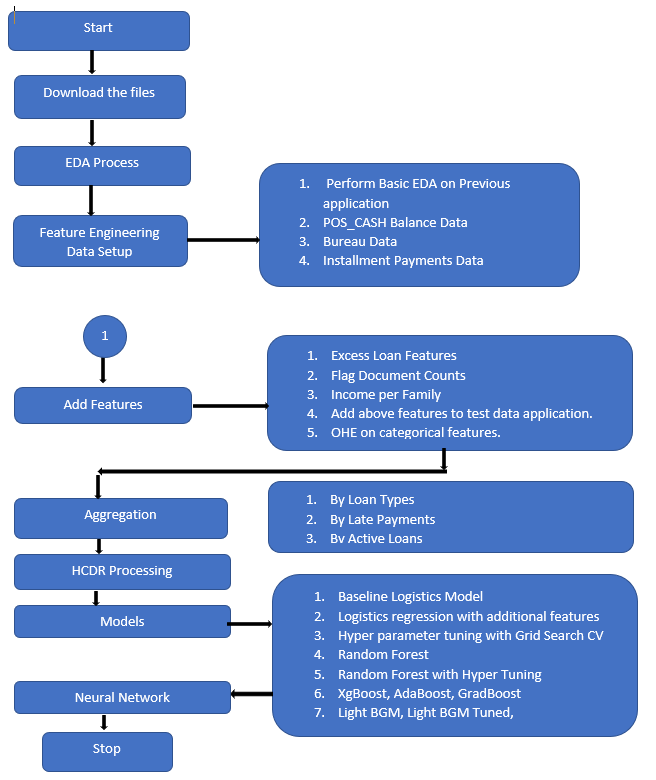

# Leakage


Data Leakage refers to a problem where information about the holdout dataset, such as a test or validation dataset, is made available to the model in the training dataset. This leakage is often small and subtle but can have a marked effect on performance.

This problem arises when we apply data preparation techniques before splitting data for model evaluation as it can lead to data leakage and, in turn, will likely result in an incorrect estimate of a model’s performance on the problem.

In my pipeline, the data preprocessing steps are applied after splitting the dataset into train, validation and test sets. This ensures that no information about the validation and test is shared to the model while training.


Moreover, two good techniques that  can be used to minimize data leakage when developing predictive models are as follows:

- Perform data preparation within your cross validation folds.
- Hold back a validation dataset for final sanity check of your developed models.

Generally, it is good practice to use both of these techniques

## Feature Engineering and transformers

We did feature engineering for the application train datasets and the 6 additional datasets.

    We selected top 20 highly correlated features from the application training dataset and 7 categorical features from application train dataset.
    Then we added additional 39 features from our additional datasets.
   

Please see our num_attribs and  cat_attribs codes below and refer our notebook section 9 for details



num_attribs = ['FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_WORK_CITY', 
               'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 
               'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG', 
               'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'AMT_GOODS_PRICE',
               'Count',  'Total_Remaining_repays',  'TOTAL_DEBT',  'Max_Initial_term',
               'TOTAL_DEBT_OVERDUE',  'TOTAL_NUMBER_OF_ACTIVE_LOANS',  'PERCENT_LATE',  
               'PERCENT_CREDIT_CARD',  'Avg_installment_days_difference',  'Avg_installment_amount_difference',
               'Cash loans', 'Consumer loans', 'Revolvingloans', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 
               'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'Total_records', 'Tot_AMT_ANNUITY_min', 
               'Tot_AMT_ANNUITY_max', 'Tot_AMT_ANNUITY_mean', 'Tot_AMT_APPLICATION_min', 'Tot_AMT_APPLICATION_max', 
               'Tot_AMT_APPLICATION_mean', 'DAYS_DECISION_min', 'DAYS_DECISION_max', 'DAYS_DECISION_mean','CC_Average_Monthly_Balance',
               'CC_Average_Credit_Card_Limit','CC_Average_Monthly_Payments','CC_Average_percentage_pass_due'
              ]
              
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

## Pipelines

Build Numeric Pipeline

    Identify the numeric features we wish to consider.

    Create a pipeline for the numeric features.

    Use DataFrameSelector() to select the desired numeric features

    Use SimpleImputer() for missing data: there are quite a few missing values in the dataset. Missing values will be imputed using the feature mean.

    Use StandardScaler() to standardize the data

The numeric pipeline will look like as follows:

    num_pipeline =Pipeline([
     ('selector', DataFrameSelector(num_attribs)),
     ('imputer', SimpleImputer(strategy="median")),
     ('std_scaler', StandardScaler()),
     ])
 
Build Categorical Pipeline:

    Identify the categorical features we wish to consider.

    Identify the range of expected values for the categorical features.

    Create a pipeline for the categorical features.

    Use SimpleImputer() for missing data: there are quite a few missing values in the dataset. Missing values will be imputed using constant values.

Then use One Hot Encoding

The numeric pipeline will look like as follows:

    cat_pipeline = Pipeline([
     ('selector', DataFrameSelector(cat_attribs)),
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
     ])
 
Union numeric pipeline and categorical pipeline:


The codes will looks like as follows:

    data_prep_pipeline= FeatureUnion(transformer_list=[
     ("num_pipeline", num_pipeline),
     ("cat_pipeline", cat_pipeline),
     ])
 
full_pipeline = Pipeline([("preparation", data_prep_pipeline)])
 
## Experimental results


XGBoost and LighGBM are better performing models from our experiments so far.

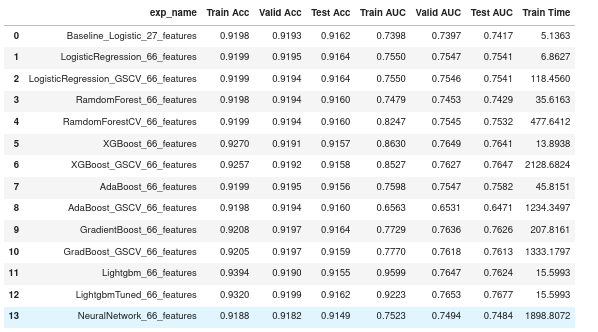

## Discussion


    We have experimented the following  models:
    
        Baseline Logistic Regression with 27 features
        Logistic Regression with additional features
        Logistic Regression with GridSearchCV
        Random Forest with additional features
        Random Forest with RandomSearchCV
        XGBoost with additional features
        GradBoost with additional features
        LightGBM with additional features
        LightGBM with Hperparameter tuning and
        Neurl network model

Out of 14 experiments we have conducted so far our best model is LightGBM with Hyperparameter Tuning. Our highest Kaggle scores for it are 0.75347 on private board and 0.7495 on public board. As we expected, our models did take time to run when we used GridSearch CV or RandomsearchCV techniques. We have opted to use Bayesian Hyperparameter optimization for tuning LightGBM model and we have observed a better performamce interms of run time. Training time of our neural network model is 200 times more than that of LightGBM_Tuned model and AUC is also around 2% less for Neural network model when compared to LightGBM.We have also observed that XGBoost and LightGBM models have given very similar AUC scores of 0.7641 and 0.7656 respectively. 

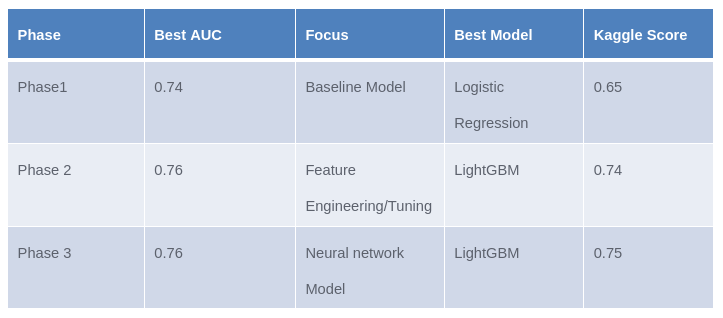

## Conclusion

In Phase III of the project, we focused on improving the test accuracy by implementing a Neural network model and also we have extended our work by doing hyperparameter tuning on some ensembled models such as XGBoost, AdaBoost, and GradBoost. However, scores are not better than that of the previous LightGBM_Tuned model. We have seen the test accuracy of 0.74 for our Neural network model. Training time of our neural network model is 200 times more than that of LightGBM_Tuned model and AUC is also around 2% less for Neural network model when compared to LightGBM. Therefore, from all the 14 experiments we have done so far our best model is LightGBM_Tuned model with a training time of around 10 seconds and a test AUC of 76% and our final Kaggle submitting score is 0.75.  We would like to extend our work in the future by tuning our neural network model and also do more feature engineering to see if we can achieve better scores. 




## Kaggle Submission

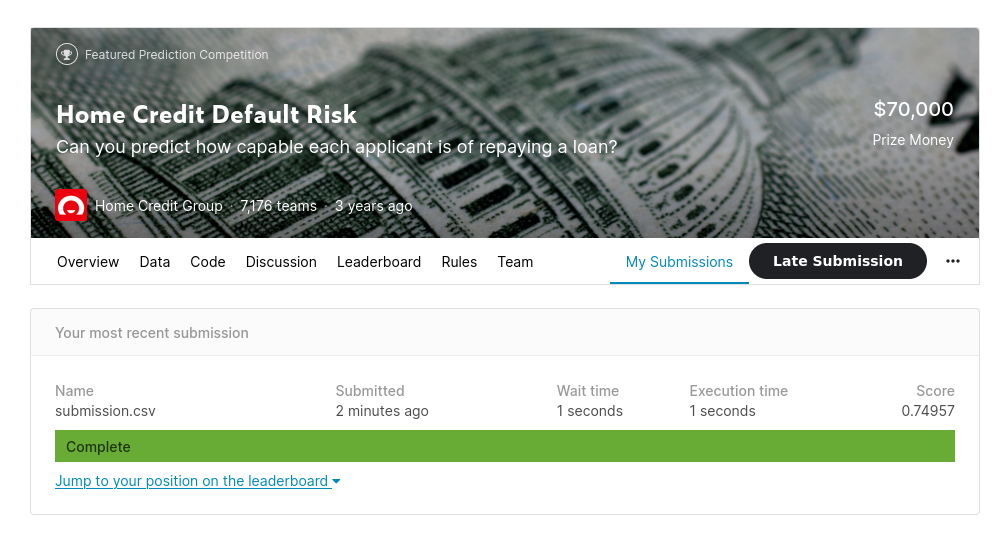


In [ ]:
!pip install pandoc

Defaulting to user installation because normal site-packages is not writeable
